## Analyse des informations de localisation de l’accident
##### lieu(x) de l’accident - au sens de la ou des route(s) sur la(les)quelle(s) a eu lieu l’accident 
Il s'agit des informations telles que renseignées dans le fichier national des accidents corporels de la circulation dit « Fichier BAAC » 
bulletin d’analyse des accidents corporels
administré par l’Observatoire national interministériel de la sécurité routière "ONISR".

In [1]:
#(1) Import des packages
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import missingno as msno

In [2]:
lieux = pd.read_csv('lieux.csv', low_memory=False)

In [3]:
lieux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017309 entries, 0 to 1017308
Data columns (total 21 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1017309 non-null  int64  
 1   num_acc     1017309 non-null  int64  
 2   catr        1017308 non-null  float64
 3   voie        925463 non-null   object 
 4   v1          381485 non-null   float64
 5   v2          43515 non-null    object 
 6   circ        1015735 non-null  float64
 7   nbv         1014578 non-null  float64
 8   pr          541825 non-null   object 
 9   pr1         540006 non-null   object 
 10  vosp        1014548 non-null  float64
 11  prof        1015360 non-null  float64
 12  plan        1015028 non-null  float64
 13  lartpc      902482 non-null   float64
 14  larrout     904468 non-null   float64
 15  surf        1015385 non-null  float64
 16  infra       1011901 non-null  float64
 17  situ        1012339 non-null  float64
 18  env1        953029 non

In [4]:
lieux.head()

Unnamed: 0       num_acc  catr voie   v1   v2  circ  nbv  pr  pr1  ...  \
0           1  200500000001   3.0   41  0.0    B   2.0  2.0   1  430  ...   
1           2  200500000002   2.0   41  0.0  NaN   0.0  2.0   0    0  ...   
2           3  200500000003   2.0   41  0.0  NaN   0.0  0.0   0    0  ...   
3           4  200500000004   3.0  916  0.0  NaN   2.0  2.0   0    0  ...   
4           5  200500000005   3.0  110  0.0  NaN   2.0  2.0  24  630  ...   

   prof  plan  lartpc  larrout  surf  infra  situ  env1  annee  vma  
0   1.0   1.0     0.0     63.0   1.0    0.0   1.0   0.0   2005  NaN  
1   1.0   1.0     0.0    100.0   1.0    0.0   5.0   0.0   2005  NaN  
2   1.0   1.0     0.0      0.0   2.0    0.0   5.0   0.0   2005  NaN  
3   1.0   1.0     0.0      0.0   1.0    0.0   1.0   0.0   2005  NaN  
4   1.0   3.0     0.0     59.0   2.0    0.0   3.0   0.0   2005  NaN  

[5 rows x 21 columns]

In [5]:
lieux.shape

(1017309, 21)

In [6]:
lieux.columns

Index(['Unnamed: 0', 'num_acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv',
       'pr', 'pr1', 'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf',
       'infra', 'situ', 'env1', 'annee', 'vma'],
      dtype='object')

 
 - Num_Acc
     Identifiant de l’accident identique à celui du fichier "rubrique CARACTERISTIQUES" repris dans l’accident.
##### Variables catégorielles
- catr
     Catégorie de route :
     1 – Autoroute
     2 – Route nationale
     3 – Route Départementale
     4 – Voie Communales
     5 – Hors réseau public
     6 – Parc de stationnement ouvert à la circulation publique
     7 – Routes de métropole urbaine
     9 – autre
 - voie
     Numéro de la route.
 - V1
     Indice numérique du numéro de route (exemple : 2 bis, 3 ter etc.).
 - V2
     Lettre indice alphanumérique de la route.
 - circ
     Régime de circulation :
     -1 – Non renseigné
     1 – A sens unique
     2 – Bidirectionnelle
     3 – A chaussées séparées
     4 – Avec voies d’affectation variable
 - vosp
    Signale l’existence d’une voie réservée, indépendamment du fait que l’accident ait lieu ou non sur cette voie.
    -1 – Non renseigné
    0 – Sans objet
    1 – Piste cyclable
    2 – Bande cyclable
    3 – Voie réservée
 - prof
    Profil en long décrit la déclivité de la route à l'endroit de l'accident :
    -1 – Non renseigné
    1 – Plat
    2 – Pente
    3 – Sommet de côte
    4 – Bas de côte
 - pr
     Numéro du PR de rattachement (numéro de la borne amont). La valeur -1 signifie que le PR n’est pas renseigné.
 - plan
     Tracé en plan :
     -1 – Non renseigné
     1 – Partie rectiligne
     2 – En courbe à gauche
     3 – En courbe à droite
     4 – En « S »
 - surf
    Etat de la surface :
    -1 – Non renseigné
    1 – Normale
    2 – Mouillée
    3 – Flaques
    4 – Inondée
    5 – Enneigée
    6 – Boue
    7 – Verglacée
    8 – Corps gras – huile
    9 – Autre
 - infra
    Aménagement - Infrastructure :
    -1 – Non renseigné
    0 – Aucun
    1 – Souterrain - tunnel
    2 – Pont - autopont
    3 – Bretelle d’échangeur ou de raccordement
    4 – Voie ferrée
    5 – Carrefour aménagé
    6 – Zone piétonne
    7 – Zone de péage
    8 – Chantier
    9 – Autres
 - situ
    Situation de l’accident :
    -1 – Non renseigné
    0 – Aucun
    1 – Sur chaussée
    2 – Sur bande d’arrêt d’urgence
    3 – Sur accotement
    4 – Sur trottoir
    5 – Sur piste cyclable
    6 – Sur autre voie spéciale
    8 – Autres
    
##### Variables numériques
 - nbv
     Nombre total de voies de circulation.
 - pr1
     Distance en mètres au PR (par rapport à la borne amont). La valeur -1 signifie que le PR n’est pas renseigné.
 - lartpc
    Largeur du terre-plein central (TPC) s'il existe (en m).
 - larrout
     Largeur de la chaussée affectée à la circulation des véhicules ne sont pas compris les bandes d'arrêt d'urgence, les TPC et les places de stationnement (en m).
 - vma
     Vitesse maximale autorisée sur le lieu et au moment de l’accident.

In [7]:
# Get data types of columns
lieux.dtypes

Unnamed: 0      int64
num_acc         int64
catr          float64
voie           object
v1            float64
v2             object
circ          float64
nbv           float64
pr             object
pr1            object
vosp          float64
prof          float64
plan          float64
lartpc        float64
larrout       float64
surf          float64
infra         float64
situ          float64
env1          float64
annee           int64
vma           float64
dtype: object

In [9]:
# Filter the DataFrame for object columns
non_numeric = lieux.select_dtypes("object")

non_numeric.head()

voie   v2   pr  pr1
0         41    B    1  430
1         41  NaN    0    0
2         41  NaN    0    0
3        916  NaN    0    0
4        110  NaN   24  630
...      ...  ...  ...  ...
1017304   43  NaN   15  500
1017305   35  NaN  303  282
1017306    6    A    5  199
1017307   86  NaN   59   99
1017308   13  NaN    6  699

[1017309 rows x 4 columns]

In [10]:
# Finding the number of unique values
# Loop through columns
for colname in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {colname} column: ", non_numeric[colname].nunique())

Number of unique values in voie column:  15020
Number of unique values in v2 column:  67
Number of unique values in pr column:  824
Number of unique values in pr1 column:  2267


###### Variable **catr** = Catégorie de route :

     1 – Autoroute
     2 – Route nationale
     3 – Route Départementale
     4 – Voie Communales
     5 – Hors réseau public
     6 – Parc de stationnement ouvert à la circulation publique
     7 – Routes de métropole urbaine
     9 – autre

In [11]:
lieux['catr'].head()

0    3.0
1    2.0
2    2.0
3    3.0
4    3.0
Name: catr, dtype: float64

In [12]:
# Convert catr from integer to category
lieux['catr'] = lieux['catr'].astype('category')

In [13]:
# Write an assert statement confirming the change
assert lieux['catr'].dtype == 'category'

In [14]:
# Print new summary statistics 
lieux['catr'].describe()

count     1017308.0
unique          8.0
top             4.0
freq       505407.0
Name: catr, dtype: float64

In [15]:
lieux['catr'].unique().to_numpy()

array([ 3.,  2.,  4.,  6.,  9.,  5.,  1., nan,  7.])

In [16]:
lieux['catr'].isna().sum()

1

In [17]:
# Replace catagory number by category names
lieux['catr'].replace([1, 2, 3, 4, 5, 6, 7, 9],
                      ['1-Autoroute', '2-Route nationale', '3-Route Départementale', '4-Voie Communales', '5-Hors réseau public', '6-Parc de stationnement ouvert à la circulation publique', '7-Routes de métropole urbaine', '9-Autres'],
                     inplace=True)

In [18]:
lieux['catr'].value_counts().sort_index()

1-Autoroute                                                  78164
2-Route nationale                                            79615
3-Route Départementale                                      325640
4-Voie Communales                                           505407
5-Hors réseau public                                          1889
6-Parc de stationnement ouvert à la circulation publique      6861
7-Routes de métropole urbaine                                 1692
9-Autres                                                     18040
Name: catr, dtype: int64

In [19]:
sns.set()

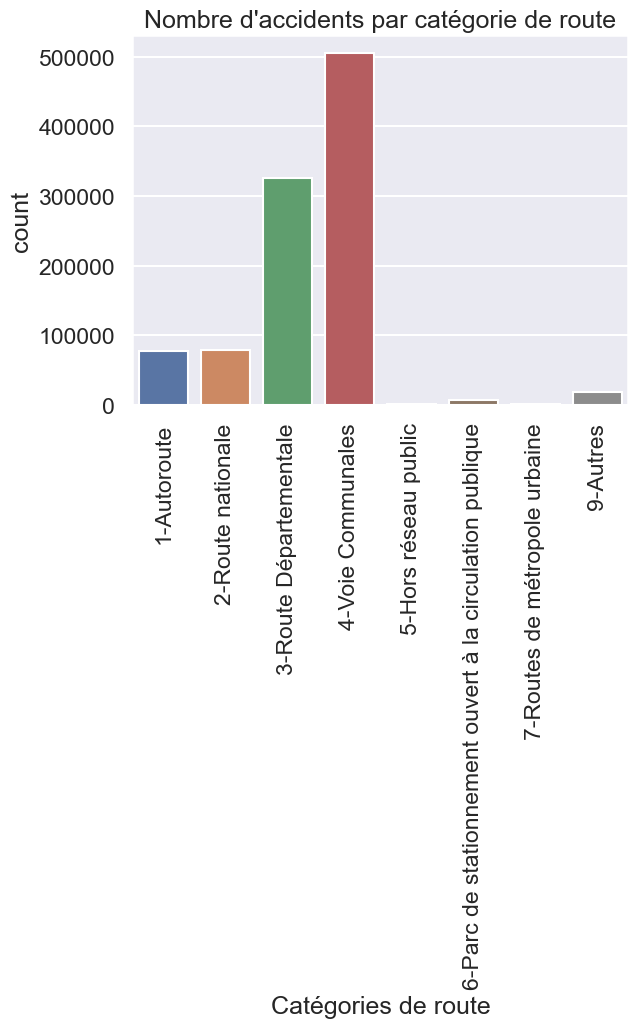

In [20]:
# Create count plot with catr on the x-axis
sns.set_context("talk")
sns.countplot(x='catr', data=lieux)
plt.xticks(rotation='vertical')
plt.xlabel("Catégories de route")
plt.title("Nombre d'accidents par catégorie de route")
# Show plot
plt.show()


###### Variable **voie**
Numéro de la route

In [21]:
# Print summary statistics of section column
print(lieux.voie.describe())

count     925463
unique     15020
top            0
freq      480031
Name: voie, dtype: object


In [22]:
print(lieux['voie'].value_counts().sort_index())

            Rue Edmond Locard               1
         318                                1
  BD PERIPHERIQUE INTERIEUR                 1
 (nouvelle rocade)                          1
 - 118 - GAUDE AVENUE DE LA                 1
                                           ..
templiers (rue des )                        1
theodule jourdain                           1
tsoundzou-Cadjifouteni ( rue )              1
tsoundzou-Kadjifouni ( rue )                1
vc                                          1
Name: voie, Length: 15020, dtype: int64


In [23]:
lieux['voie'].value_counts()

0                              480031
1                               25060
6                               11294
7                               10358
4                                9442
                                ...  
109E2                               1
GAY-LUSSAC RUE N° IMPAIRS           1
Europe ( rond point de l' )         1
DAGOBERT (RUE)                      1
Gabriel Péri (AV)                   1
Name: voie, Length: 15020, dtype: int64

In [24]:
lieux['voie'].value_counts(normalize=True).head(250)

0      0.518693
1      0.027078
6      0.012204
7      0.011192
4      0.010202
         ...   
417    0.000391
211    0.000391
656    0.000390
904    0.000387
134    0.000386
Name: voie, Length: 250, dtype: float64

Constat : besoin de nettoyage pour ce champ ***voie***, qui devrait contenir un numéro de rue mais qui contient des noms de rue. Champ inexploitable

###### Variable **v1**
Indice numérique du numéro de route (exemple : 2 bis, 3 ter etc.)

In [25]:
lieux['v1'].dtype

dtype('float64')

In [26]:
# Print summary statistics of section column
print(lieux.v1.describe())

count    381485.000000
mean          0.064058
std           0.538597
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: v1, dtype: float64


In [27]:
lieux['v1'].unique()

array([ 0.,  2.,  1.,  9.,  6.,  4.,  5.,  7.,  3.,  8., nan])

In [28]:
# Convert v1 from float to category
lieux['v1'] = lieux['v1'].astype('category')

In [29]:
# Write an assert statement confirming the change
assert lieux['v1'].dtype == 'category'

In [33]:
lieux['v1'].isna().sum()

1009417

In [30]:
lieux['v1'].value_counts(normalize=True).sort_index()

0.0    0.979312
1.0    0.002674
2.0    0.010525
3.0    0.002186
4.0    0.001038
5.0    0.000608
6.0    0.001208
7.0    0.001028
8.0    0.000647
9.0    0.000773
Name: v1, dtype: float64

In [31]:
# La valeur "0" peut être considérée comme une valeur non exploitable ==> elle eput être remplacée par NAN
lieux['v1'].replace(0, np.nan, inplace=True)

In [32]:
lieux['v1'].value_counts(normalize=True).sort_index().round(2)

1.0    0.13
2.0    0.51
3.0    0.11
4.0    0.05
5.0    0.03
6.0    0.06
7.0    0.05
8.0    0.03
9.0    0.04
Name: v1, dtype: float64

In [33]:
lieux['v1'].isna().sum()

1009417

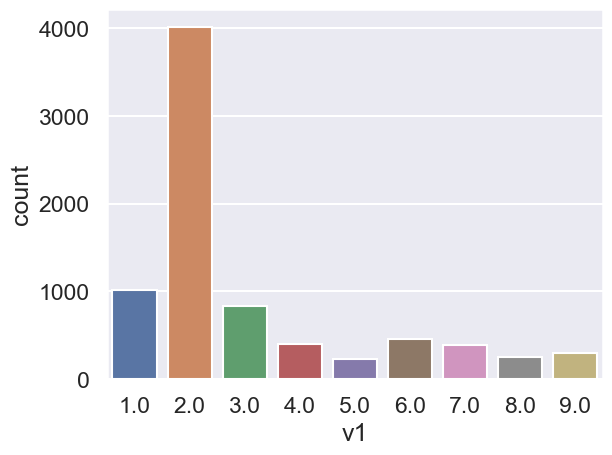

In [34]:
# Create count plot with catr on the x-axis
sns.countplot(x='v1', data=lieux)
plt.show()

Le champ "v1" est très très faiblement renseigné. Nous devrions le supprimer.

###### Variable **v2**
Lettre indice alphanumérique de la route

In [35]:
lieux['v2'].dtype

dtype('O')

In [36]:
lieux['v2'].unique()

array(['B', nan, 'A', 'E', 'N', 'D', 'C', 'F', 'R', 'G', 'J', 'b', 'a',
       'S', 'W', 'H', 'P', '\x04', 'K', 'T', 'L', 'M', 'Z', 'O', 'I', 's',
       'n', 'Q', 'e', 'V', 'd', 'c', 'z', 'U', 'v', 'm', 'Y', 'w', 'y',
       '1', '4', '7', '3', '2', '5', '6', '8', 'l', '9', '0', 't', 'f',
       'p', 'g', 'r', 'X', 'h', 'k', 'INT', ' -', 'EXT', '15', 'II', '1A',
       'IV', ' D', 'A1', 'CD'], dtype=object)

In [37]:
lieux['v2'].nunique()

67

In [38]:
# Print summary statistics of section column
print(lieux.v2.describe())

count     43515
unique       67
top           A
freq      22336
Name: v2, dtype: object


In [39]:
lieux['v2'].value_counts(normalize=True).sort_index().round(2)

     0.01
 -    0.00
 D    0.00
0     0.03
1     0.00
      ... 
t     0.00
v     0.00
w     0.00
y     0.00
z     0.00
Name: v2, Length: 67, dtype: float64

In [219]:
len(lieux[lieux['v2'].isin(['B', 'A', 'E', 'N', 'D', 'C', 'F', 'R', 'G', 'J', 'b', 'a', 'S', 'W', 'H', 'P', 
                            'K', 'T', 'L', 'M', 'Z', 'O', 'I', 's', 'n', 'Q', 'e', 'V', 'd', 'c', 'z', 'U', 
                            'v', 'm', 'Y', 'w', 'y', '1', '4', '7', '3', '2', '5', '6', '8', 'l', '9', '0', 
                            't', 'f', 'p', 'g', 'r', 'X', 'h', 'k', ' D'])]) /lieux.shape[0]*100

4.196070220552457

In [220]:
lieux['v2'].isna().sum() /lieux.shape[0]*100

95.72253857972356

In [41]:
# QUESTiON = Quelles devraient être les Valeurs alphanumérique attendues ?
len(lieux[lieux['v2'].isin(['-1', '1', '2', '3', '4'])])

416

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


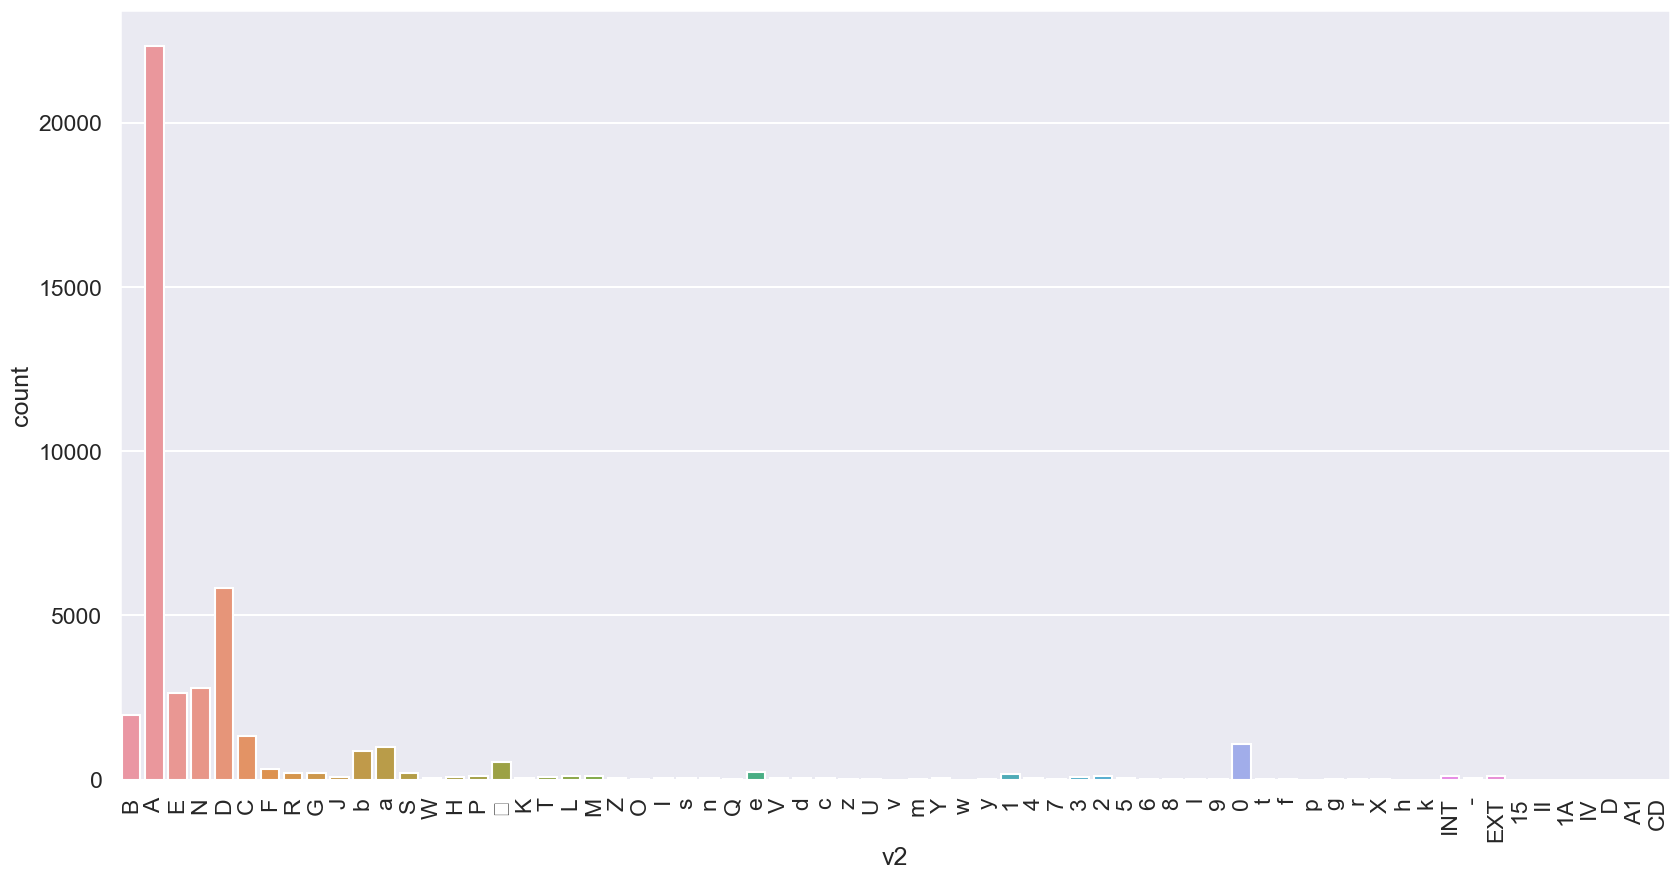

In [44]:
# Plot the counts of each category
plt.figure(figsize=(20, 10))
sns.countplot(data=lieux, x="v2")
plt.xticks(rotation='vertical')
plt.show()

~~Champ très mal renseigné, sur 43515 valeurs non nulles, seulement 416 sont corrctement renseignés. 
En résumé, la plupart des valeurs rnseignées ne pas celles attendues. ~~

Ce qui implique que ce champ est ***Inexploitable***.

<div class="alert alert-info">
<h6> Variable **circ** pour Régime de circulation :</h6>
    
    * -1 – Non renseigné
    * 1 – A sens unique
    * 2 – Bidirectionnelle
    * 3 – A chaussées séparées
    * 4 – Avec voies d’affectation variable
    
</div>

In [45]:
lieux['circ'].dtype

dtype('float64')

In [46]:
# Convert circ from float to category
lieux['circ'] = lieux['circ'].astype('category')
# Write an assert statement confirming the change
assert lieux['circ'].dtype == 'category'

In [47]:
# Print new summary statistics 
lieux['circ'].describe()

count     1015735.0
unique          6.0
top             2.0
freq       642406.0
Name: circ, dtype: float64

In [48]:
# Print unique values 
lieux['circ'].unique().to_numpy()

array([ 2.,  0.,  3.,  4.,  1., nan, -1.])

In [49]:
(lieux['circ'].isna().sum()/lieux.shape[0])*100

0.1547219183158706

In [50]:
lieux['circ'].value_counts().sort_index()

-1.0      3154
0.0      49966
1.0     181109
2.0     642406
3.0     133445
4.0       5655
Name: circ, dtype: int64

In [51]:
# Nous allons considérer que les '0' corrspondent à la catégorie 'non renseigné', soit -1
lieux['circ'].replace(0.0, -1.0, inplace=True)

In [52]:
# Print unique values 
lieux['circ'].unique().to_numpy()

array([ 2., -1.,  3.,  4.,  1., nan])

In [53]:
# Replace catagory number by category names
lieux['circ'].replace([-1, 1, 2, 3, 4],
                      ['Non renseigné(-1)', 'A sens unique(1)', 'Bidirectionnelle(2)', 'A chaussées séparées(3)', 'Avec voies d’affectation variable(4)'],
                     inplace=True)

In [54]:
# Print unique values 
lieux['circ'].unique().to_numpy()

array(['Bidirectionnelle(2)', 'Non renseigné(-1)',
       'A chaussées séparées(3)', 'Avec voies d’affectation variable(4)',
       'A sens unique(1)', nan], dtype=object)

In [55]:
lieux['circ'].value_counts().sort_index()

Non renseigné(-1)                        53120
A sens unique(1)                        181109
Bidirectionnelle(2)                     642406
A chaussées séparées(3)                 133445
Avec voies d’affectation variable(4)      5655
Name: circ, dtype: int64

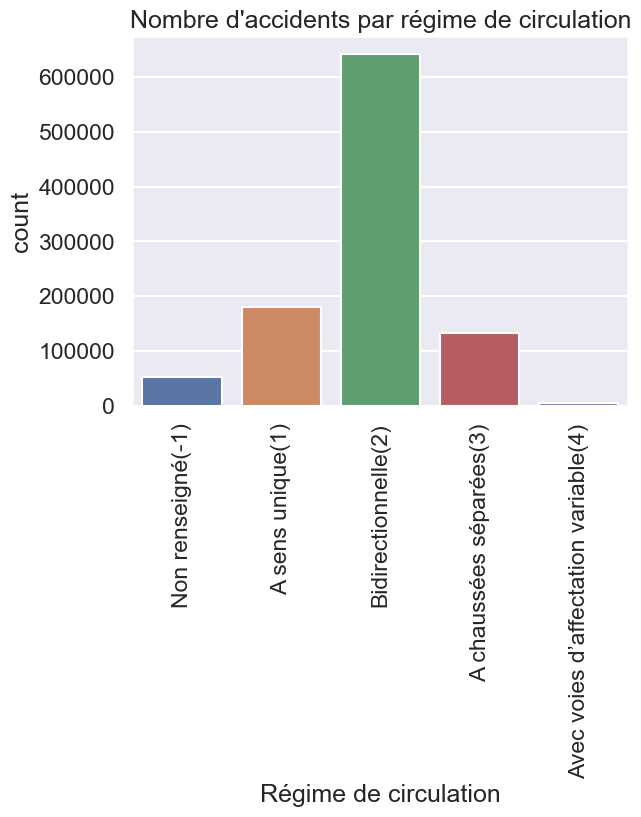

In [56]:
# Create count plot with circ on the x-axis
sns.countplot(x='circ', data=lieux)
plt.xticks(rotation='vertical')
plt.xlabel("Régime de circulation")
plt.title("Nombre d'accidents par régime de circulation")
# Show plot
plt.show()

###### Variable ***nbv***
Nombre total de voies de circulation.

In [57]:
lieux['nbv'].dtype

dtype('float64')

In [58]:
lieux['nbv'].unique()

array([ 2.,  0.,  1.,  3.,  4.,  6., 25.,  5., 20.,  7.,  8., 30., 10.,
       40., 50., 12.,  9., 27., 62., 60., 16., 26., 11., 21., 24., 29.,
       54., 39., 14., 84., 13., 18., 90., 15., 36., 65., 22., 42., 17.,
       99., 31., 53., 76., 70., 86., 91., 28., 45., 52., 33., 41., 44.,
       23., nan, -1.])

In [59]:
lieux['nbv'].isna().sum()

2731

In [60]:
# Print summary statistics of section column
print(lieux.nbv.describe())

count    1.014578e+06
mean     2.086871e+00
std      1.520311e+00
min     -1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      9.900000e+01
Name: nbv, dtype: float64


In [61]:
lieux.nbv.max()

99.0

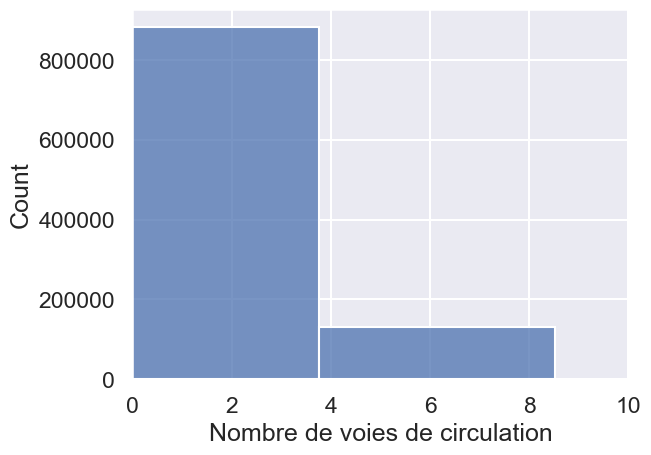

In [64]:
# Plot a histogram on nbv on the x-axis
sns.histplot(data=lieux, x="nbv")
plt.xlim(0, 10)
plt.xlabel('Nombre de voies de circulation')
# Show plot
plt.show();

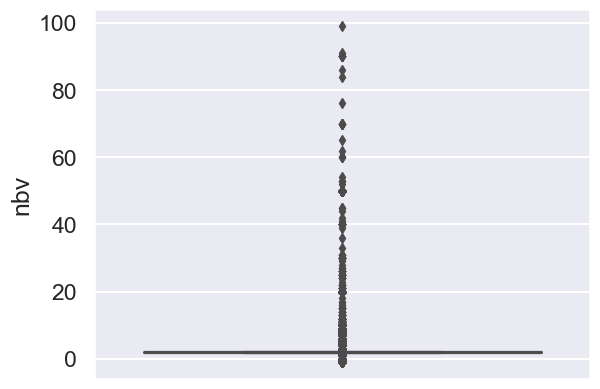

In [65]:
sns.boxplot(y=lieux.nbv)
plt.show()

In [66]:
(lieux[lieux['nbv']==2].shape[0])*100/lieux.shape[0]

56.18047220657637

<div class="alert alert-warning">
    <font color=#FF0000><b>Constat </b></font>: Trop de valeurs abbérantes pour le nombre de voies de circulation.
                Nous pouvons retenir 2 comme nombre de voies de circulation. ***
</div>

###### Variable **vosp**
Signale l’existence d’une voie réservée, indépendamment du fait que l’accident ait lieu ou non sur cette voie.

    -1 – Non renseigné
    0 – Sans objet
    1 – Piste cyclable
    2 – Bande cyclable
    3 – Voie réservée

In [67]:
lieux['vosp'].dtype

dtype('float64')

In [68]:
# Convert vosp from integer to category
lieux['vosp'] = lieux['vosp'].astype('category')
# Write an assert statement confirming the change
assert lieux['vosp'].dtype == 'category'

In [69]:
# Print summary statistics of vosp column
lieux.vosp.value_counts().sort_index()

-1.0       669
0.0     950085
1.0      21389
2.0      13755
3.0      28650
Name: vosp, dtype: int64

In [70]:
lieux['vosp'].unique().to_numpy()

array([ 0.,  1.,  3.,  2., nan, -1.])

In [71]:
lieux['vosp'].isna().sum()*100/lieux.shape[0]

0.27140229763031687

In [72]:
# Replace catagory number by category names
lieux['vosp'].replace([-1, 0, 1, 2, 3],
                      ['Non renseigné(-1)', 'Sans objet(0)', 'Piste cyclable(1)', 'Bande cyclable(2)', 'Voie réservée(3)'],
                     inplace=True)

In [73]:
lieux.vosp.value_counts(normalize=True).sort_index()

Non renseigné(-1)    0.000659
Sans objet(0)        0.936461
Piste cyclable(1)    0.021082
Bande cyclable(2)    0.013558
Voie réservée(3)     0.028239
Name: vosp, dtype: float64

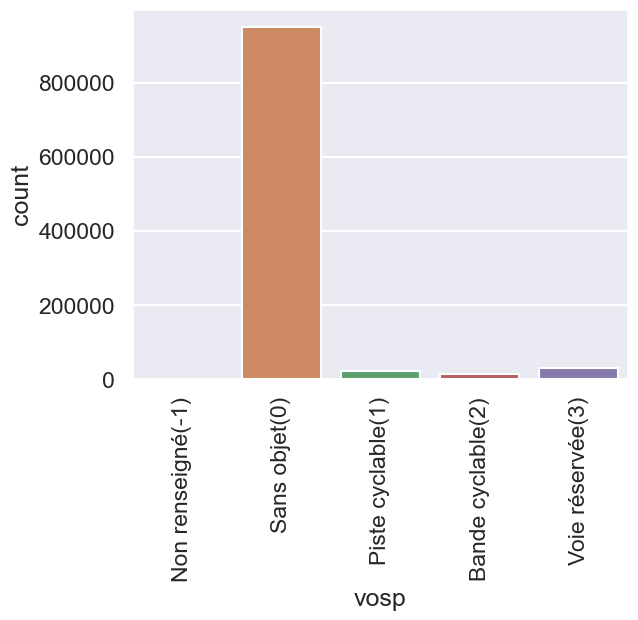

In [74]:
# Create count plot with vosp on the x-axis
sns.countplot(x='vosp', data=lieux)
plt.xticks(rotation=90)
# Show plot
plt.show()

Constat : Le signalement de l’existence d’une voie réservée est ***sans objet pour 94% des observations***. Ce champ étant indépendamt du fait qu'un accident ait lieu ou non sur la voie ***semble pourvoir être considéré comme sans intérêt pour notre étude. ***

######  Variable **prof**
Profil en long décrit la déclivité de la route à l'endroit de l'accident :

  + -1 – Non renseigné
  + 1 – Plat
  + 2 – Pente
  + 3 – Sommet de côte
  + 4 – Bas de côte

In [75]:
lieux['prof'].dtype
# Print summary statistics of section column

dtype('float64')

In [76]:
# Convert prof from integer to category
lieux['prof'] = lieux['prof'].astype('category')
# Write an assert statement confirming the change
assert lieux['prof'].dtype == 'category'

In [77]:
# Print new summary statistics 
lieux['prof'].describe()

count     1015360.0
unique          6.0
top             1.0
freq       775410.0
Name: prof, dtype: float64

In [78]:
lieux['prof'].value_counts().sort_index()

-1.0        14
0.0      65946
1.0     775410
2.0     142194
3.0      18138
4.0      13658
Name: prof, dtype: int64

In [79]:
# Nous allons considérer que les '0.0' corrspondent à la catégorie 'non renseigné', soit -1
lieux['prof'].replace(0.0, -1.0, inplace=True)

In [80]:
lieux['prof'].unique().to_numpy()

array([ 1., -1.,  2.,  3.,  4., nan])

In [81]:
# Pourcentage de valeurs manquantes
lieux['prof'].isna().sum()*100/lieux.shape[0]

0.1915838747125996

In [82]:
# Replace catagory number by category names
lieux['prof'].replace([-1, 1, 2, 3, 4],
                      ['Non renseigné(-1)', 'Plat(1)', 'Pente(2)', 'Sommet de côte(3)', 'Bas de côte(4)'],
                     inplace=True)

In [79]:
# Nous allons considérer que les 'nan' corrspondent à la catégorie 'non renseigné', soit -1
#lieux['prof'].fillna(-1.0, inplace=True)

In [83]:
lieux['prof'].value_counts(normalize=True).sort_index().round(2)

Non renseigné(-1)    0.06
Plat(1)              0.76
Pente(2)             0.14
Sommet de côte(3)    0.02
Bas de côte(4)       0.01
Name: prof, dtype: float64

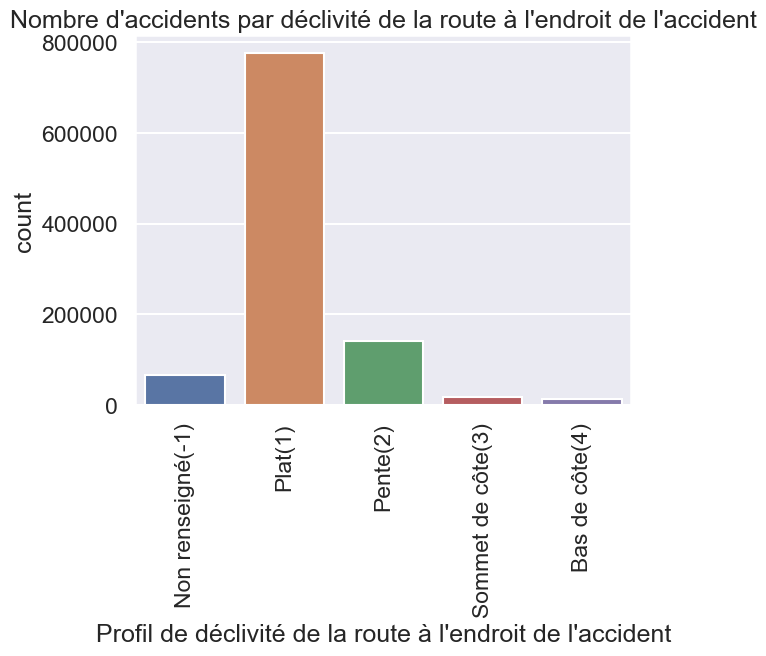

In [84]:
# Create count plot with prof on the x-axis
sns.countplot(x='prof', data=lieux)
plt.xticks(rotation='vertical')
plt.xlabel("Profil de déclivité de la route à l'endroit de l'accident")
plt.title("Nombre d'accidents par déclivité de la route à l'endroit de l'accident")
# Show plot
plt.show()

##### Variable **pr**
Numéro du PR de rattachement (numéro de la borne amont). 
 > La valeur -1 signifie que le PR n’est pas renseigné

In [85]:
lieux.pr.dtype

dtype('O')

In [86]:
# Print summary statistics of section column
print(lieux.pr.describe())

count     541825
unique       824
top            0
freq      177151
Name: pr, dtype: object


In [87]:
lieux.pr.unique()

array(['1', '0', '24', '47', '6', '53', '3', '32', '25', '14', '4', '28',
       '40', '23', '5', '9', '12', '11', '39', '20', '16', '15', '27',
       '49', '38', '36', '62', '98', '29', '7', '13', '55', '21', '52',
       '57', '83', '42', '8', '26', '18', '19', '30', '46', '35', '17',
       '66', '103', '59', '43', '10', '113', '77', '301', '72', '48',
       '22', '50', '33', '2', '31', '51', '44', '109', '106', '41', '71',
       '60', '56', '34', '86', '89', '54', '105', '88', '95', '45', '96',
       '65', '61', '79', '58', '69', '93', '67', '78', '76', '37', '107',
       '145', '150', '102', '124', '149', '87', '64', '80', '90', '63',
       '73', '68', '239', '245', '100', '142', '127', '82', '75', '141',
       '85', '229', '94', '84', '92', '74', '81', '125', '117', '110',
       '139', '135', '97', '183', '114', '332', '165', '184', '146',
       '158', '126', '427', '412', '410', '118', '134', '140', '174',
       '313', '257', '190', '191', '205', '210', '198', '185', '

In [88]:
len(lieux[lieux.pr == '-1'])

0

In [91]:
lieux[lieux.pr.str.contains("1") == True]["pr"]

0            1
10           1
15           1
16          14
51          12
          ... 
1017297    (1)
1017298    (1)
1017299     11
1017300    (1)
1017304     15
Name: pr, Length: 145499, dtype: object

In [92]:
lieux[lieux.pr.str.contains("1") == True]["pr"].unique()

array(['1', '14', '12', '11', '16', '15', '13', '21', '18', '19', '17',
       '103', '10', '113', '301', '31', '51', '109', '106', '41', '71',
       '105', '61', '107', '145', '150', '102', '124', '149', '100',
       '142', '127', '141', '81', '125', '117', '110', '139', '135',
       '183', '114', '165', '184', '146', '158', '126', '412', '410',
       '118', '134', '140', '174', '313', '190', '191', '210', '198',
       '185', '319', '168', '137', '111', '173', '177', '132', '130',
       '164', '144', '159', '194', '186', '251', '147', '131', '91',
       '115', '112', '162', '178', '1009', '1803', '1109', '1002', '2101',
       '5104', '1209', '2401', '1031', '1101', '5105', '1708', '101',
       '181', '182', '196', '121', '541', '312', '241', '316', '212',
       '116', '1607', '157', '166', '108', '214', '119', '143', '215',
       '314', '371', '175', '415', '133', '187', '122', '172', '104',
       '219', '188', '471', '291', '136', '123', '189', '197', '1114',
       '331'

In [93]:
lieux[lieux.pr.str.contains("-1") == True]["pr"].unique()

array([], dtype=object)

In [94]:
lieux.pr.value_counts(normalize=True).sort_index().round(2)

(1)     0.01
0       0.33
0.01    0.00
1       0.07
10      0.02
        ... 
987     0.00
99      0.00
9900    0.00
9929    0.00
999     0.00
Name: pr, Length: 824, dtype: float64

In [95]:
# Pourcentage de valeurs manquantes
lieux.pr.isna().sum()*100/lieux.shape[0]

46.73938793424613

Constat : les valeurs du champ 'pr' incohérentes : valeur -1 jamais renseignée, valeurs uniques trop élévées (825), près de 47% de valeurs manquantes, 33% contiennent la valeur '0'. Ce qui revient à 70% des valeurs inexploitables, et les 30% restants sont reparties sur 823 valeurs. Voir si possibilité de regrouper certaines valeurs ?

###### Variable **pr1**
Distance en mètres au PR (par rapport à la borne amont). 
La valeur -1 signifie que le PR n’est pas renseigné.

In [96]:
lieux.pr1.dtype

dtype('O')

In [97]:
# Convert pr from object to float
lieux.pr1 = pd.to_numeric(lieux.pr1, errors='coerce')#.astype(float)

In [98]:
lieux.pr1.dtype

dtype('float64')

In [99]:
# Print summary statistics of section column
print(lieux.pr1.describe())

count    532407.000000
mean        271.541486
std         354.108501
min           0.000000
25%           0.000000
50%         100.000000
75%         500.000000
max        9540.000000
Name: pr1, dtype: float64


In [100]:
lieux.pr1.unique()

array([ 430.,    0.,  630., ..., 3177., 2012., 2287.])

In [101]:
# Pourcentage de valeurs manquantes
lieux.pr1.isna().sum()*100/lieux.shape[0]

47.66516368183118

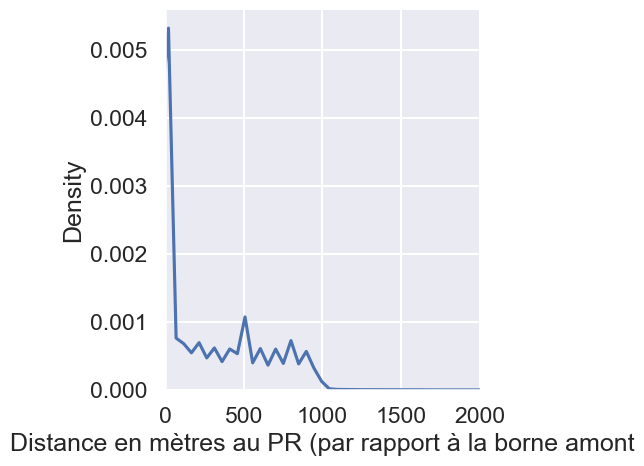

In [102]:
sns.displot(lieux.pr1, kind="kde")
plt.xlim(0, 2000)
plt.xlabel('Distance en mètres au PR (par rapport à la borne amont')
plt.show()

/var/folders/g0/g76qn8pj0j10kx_v9q9r022w0000gn/T/ipykernel_61540/2932811742.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=lieux, x="pr1", hue="nbv", cut=0, cumulative=True)
/var/folders/g0/g76qn8pj0j10kx_v9q9r022w0000gn/T/ipykernel_61540/2932811742.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=lieux, x="pr1", hue="nbv", cut=0, cumulative=True)
/var/folders/g0/g76qn8pj0j10kx_v9q9r022w0000gn/T/ipykernel_61540/2932811742.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=lieux, x="pr1", hue="nbv", cut=0, cumulative=True)
/var/folders/g0/g76qn8pj0j10kx_v9q9r022w0000gn/T/ipykernel_61540/2932811742.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning

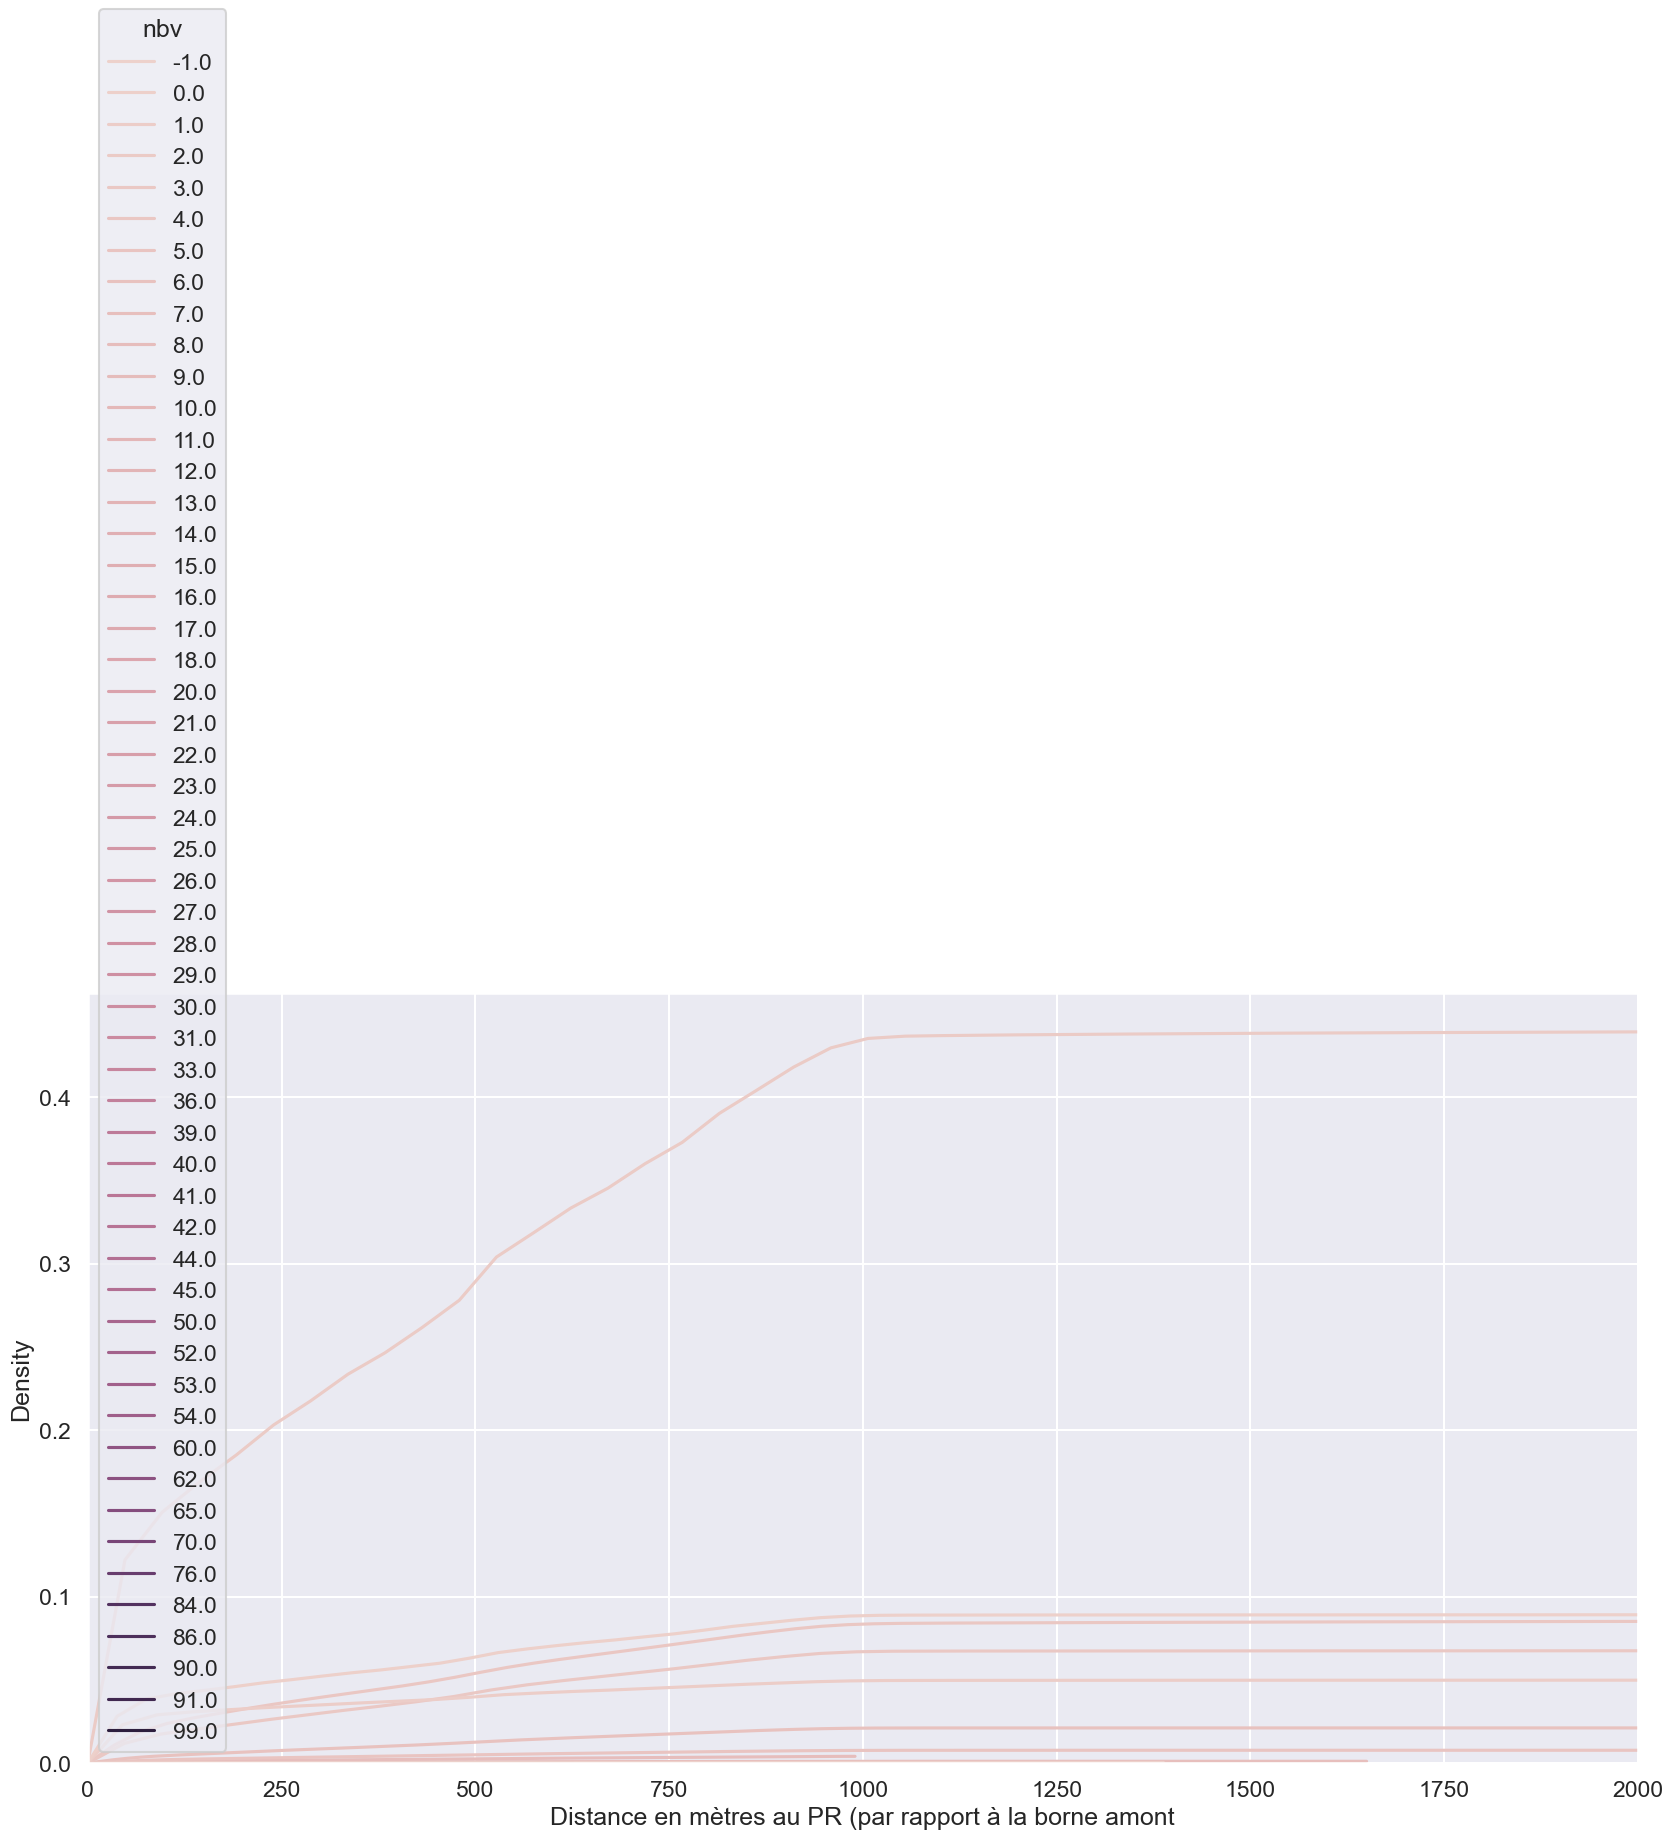

In [106]:
plt.figure(figsize=(20, 10))
sns.kdeplot(data=lieux, x="pr1", hue="nbv", cut=0, cumulative=True)
plt.xlim(0, 2000)
plt.xlabel('Distance en mètres au PR (par rapport à la borne amont')
plt.show()

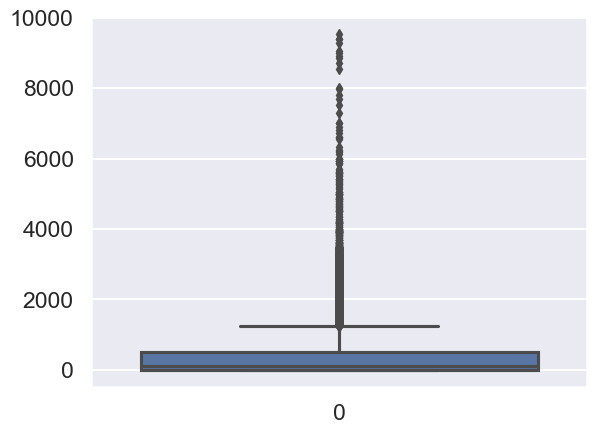

In [107]:
sns.boxplot(lieux.pr1)
plt.show()

Même **Constat** que 'pr'  : les valeurs du champ 'pr1' semblent être liées aux valeurs du 'pr'

Variable **plan** pour le Tracé en plan :
  + -1 – Non renseigné
  + 1 – Partie rectiligne
  + 2 – En courbe à gauche
  + 3 – En courbe à droite
  + 4 – En « S »

In [108]:
lieux['plan'].dtype

dtype('float64')

In [109]:
# Convert plan from integer to category
lieux['plan'] = lieux['plan'].astype('category')
# Write an assert statement confirming the change
assert lieux['plan'].dtype == 'category'

In [110]:
# Print new summary statistics 
lieux['plan'].describe()

count     1015028.0
unique          6.0
top             1.0
freq       775434.0
Name: plan, dtype: float64

In [111]:
lieux['plan'].value_counts(normalize=True).sort_index()

-1.0    0.000011
0.0     0.065434
1.0     0.763953
2.0     0.082715
3.0     0.075157
4.0     0.012731
Name: plan, dtype: float64

In [112]:
# Nous allons considérer que les '0' corrspondent à la catégorie 'non renseigné', soit -1
lieux['plan'].replace(0.0, -1.0, inplace=True)

In [113]:
# Replace catagory number by category names
lieux['plan'].replace([-1, 1, 2, 3, 4],
                      ['Non renseigné(-1)', 'Partie rectiligne(1)', 'En courbe à gauche(2)', 'En courbe à droite(3)', 'En « S »(4)'],
                     inplace=True)

In [114]:
lieux['plan'].value_counts(normalize=True).sort_index()

Non renseigné(-1)        0.065445
Partie rectiligne(1)     0.763953
En courbe à gauche(2)    0.082715
En courbe à droite(3)    0.075157
En « S »(4)              0.012731
Name: plan, dtype: float64

In [115]:
# Pourcentage de valeurs manquantes
lieux['plan'].isna().sum()*100/lieux.shape[0]

0.2242189934425037

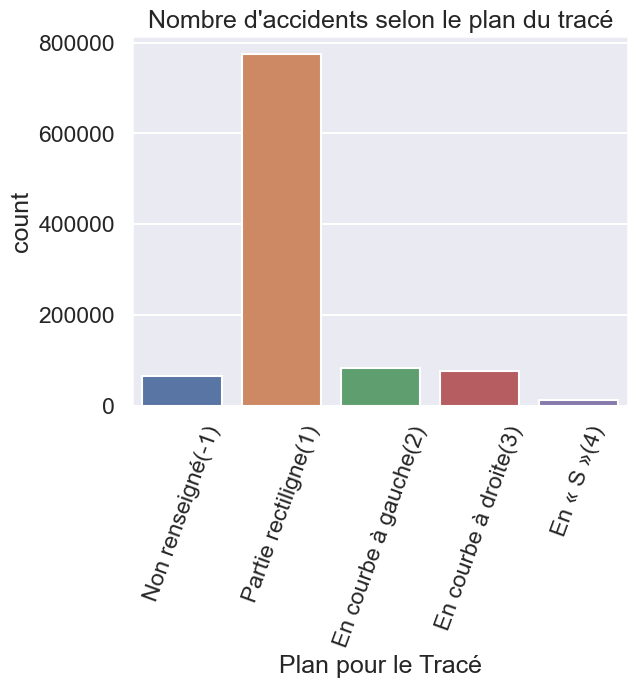

In [116]:
# Create count plot with plan on the x-axis
sns.countplot(x='plan', data=lieux)
plt.xticks(rotation=70)
plt.xlabel("Plan pour le Tracé")
plt.title("Nombre d'accidents selon le plan du tracé")
# Show plot
plt.show()

######  Variable **lartpc**
Largeur du terre-plein central (TPC) s'il existe (en m).

In [117]:
lieux.lartpc.dtype

dtype('float64')

In [118]:
# Print summary statistics of section column
print(lieux.lartpc.describe())

count    902482.000000
mean          5.307439
std          23.055074
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         960.000000
Name: lartpc, dtype: float64


In [119]:
# Pourcentage de valeurs manquantes
lieux.lartpc.isna().sum()*100/lieux.shape[0]

11.287327645779207

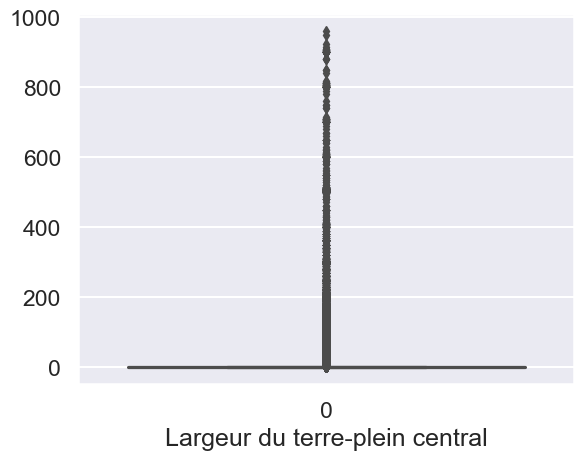

In [120]:
sns.boxplot(lieux.lartpc)
plt.xlabel('Largeur du terre-plein central')
plt.show()

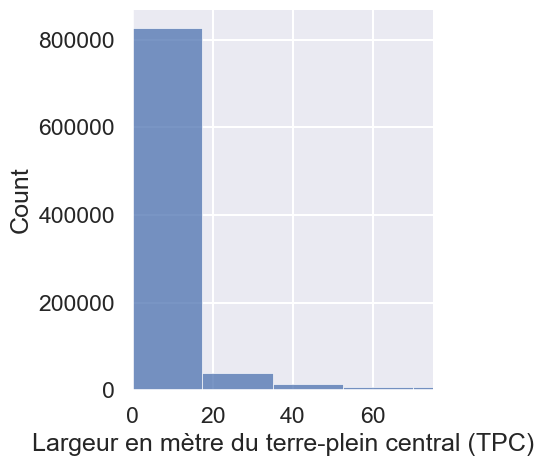

In [121]:
sns.displot(lieux.lartpc, bins=55)
plt.xlim(0, 75)
plt.xlabel('Largeur en mètre du terre-plein central (TPC)')
plt.show()

Constat : Large valeurs extrêmes, prédominence de la valeur nulle.

###### Variable **larrout**
Largeur de la chaussée affectée à la circulation des véhicules ne sont pas compris les bandes d'arrêt
d'urgence, les TPC et les places de stationnement (en m).

In [122]:
lieux.larrout.dtype

dtype('float64')

In [123]:
# Print summary statistics of section column
print(lieux.larrout.describe())

count    904468.000000
mean         57.925162
std          64.608495
min         -81.000000
25%           0.000000
50%          60.000000
75%          80.000000
max         999.000000
Name: larrout, dtype: float64


In [124]:
lieux.larrout.min()

-81.0

In [ ]:
# une largeur ne peut pas être négative. Supprimer les valeurs négatives ou les remplacer par des NAN


<label>Tasks</label>
<ul>
    <input type="checkbox"> Task : Gérer les valeurs négative pour le champ 'larrout' <br>
</ul>

In [125]:
# Pourcentage de valeurs manquantes
lieux.larrout.isna().sum()*100/lieux.shape[0]

11.09210672470213

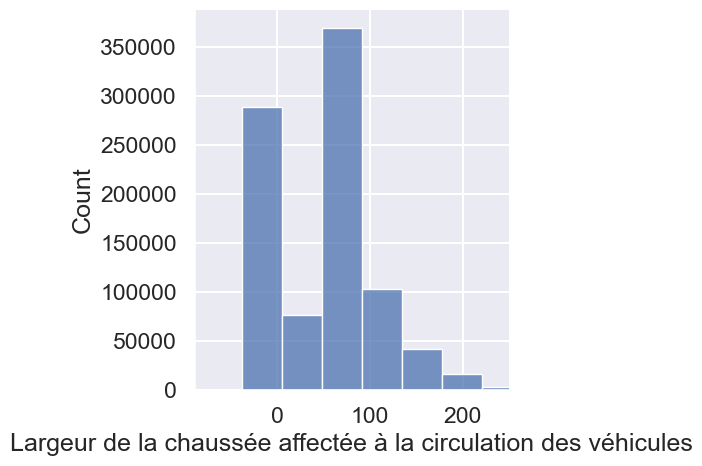

In [126]:
sns.displot(lieux.larrout, bins=25)
plt.xlim(-90, 250)
plt.xlabel('Largeur de la chaussée affectée à la circulation des véhicules')
plt.show()

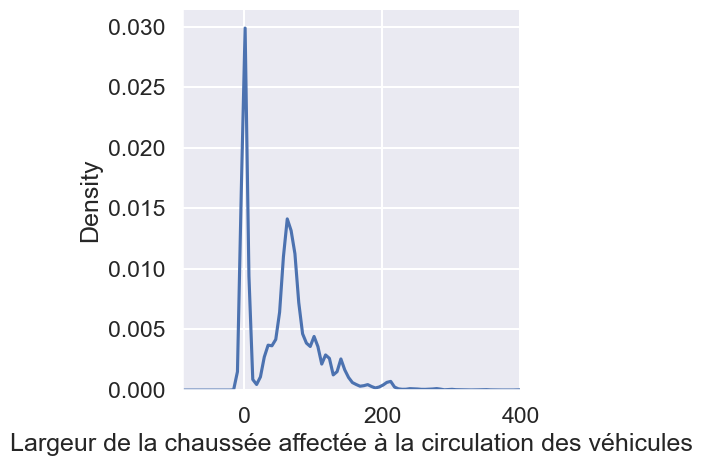

In [127]:
sns.displot(lieux.larrout, kind="kde")
plt.xlim(-90, 400)
plt.xlabel('Largeur de la chaussée affectée à la circulation des véhicules')
plt.show()

Constat : existance de variables négatives. La largeur de la chaussée ne peut être nulle et pourtant il existe un pic à 0.

Variable **surf** (Etat de la surface) :
  + -1 – Non renseigné
  + 1 – Normale
  + 2 – Mouillée
  + 3 – Flaques
  + 4 – Inondée
  + 5 – Enneigée
  + 6 – Boue
  + 7 – Verglacée
  + 8 – Corps gras – huile
  + 9 – Autre

In [128]:
lieux.surf.dtype

dtype('float64')

In [129]:
# Convert surf from integer to category
lieux['surf'] = lieux['surf'].astype('category')
# Write an assert statement confirming the change
assert lieux['surf'].dtype == 'category'

In [130]:
# Print new summary statistics of surf column
print(lieux.surf.describe())

count     1015385.0
unique         11.0
top             1.0
freq       792071.0
Name: surf, dtype: float64


In [131]:
lieux.surf.unique().to_numpy()

array([ 1.,  2.,  0.,  9.,  7.,  8.,  5.,  6.,  3.,  4., nan, -1.])

In [132]:
lieux.surf.value_counts()

1.0     792071
2.0     174351
0.0      29139
7.0       6314
9.0       5456
5.0       3043
8.0       2484
3.0       1436
6.0        568
4.0        502
-1.0        21
Name: surf, dtype: int64

In [133]:
# Nous allons considérer que les '0' corrspondent à la catégorie 'non renseigné', soit -1
lieux.surf.replace(0.0, -1.0, inplace=True)

In [134]:
# Replace catagory number by category names
lieux.surf.replace([-1, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['Non renseigné(-1)', 'Normale(1)', 'Mouillée(2)', 'Flaques(3)', 'Inondée(4)', 
                                             'Enneigée(5)', 'Boue(6)', 'Verglacée(7)', 'Corps gras – huile(8)', 'Autre(9)'],
                     inplace=True)

In [125]:
# Nous allons considérer que les 'nan' corrspondent à la catégorie 'non renseigné', soit -1
#lieux.surf.fillna(-1.0, inplace=True)

In [135]:
# Pourcentage de valeurs manquantes
lieux.surf.isna().sum()*100/lieux.shape[0]

0.18912641095281768

In [136]:
lieux['surf'].value_counts(normalize=True)

Normale(1)               0.780070
Mouillée(2)              0.171709
Non renseigné(-1)        0.028718
Verglacée(7)             0.006218
Autre(9)                 0.005373
Enneigée(5)              0.002997
Corps gras – huile(8)    0.002446
Flaques(3)               0.001414
Boue(6)                  0.000559
Inondée(4)               0.000494
Name: surf, dtype: float64

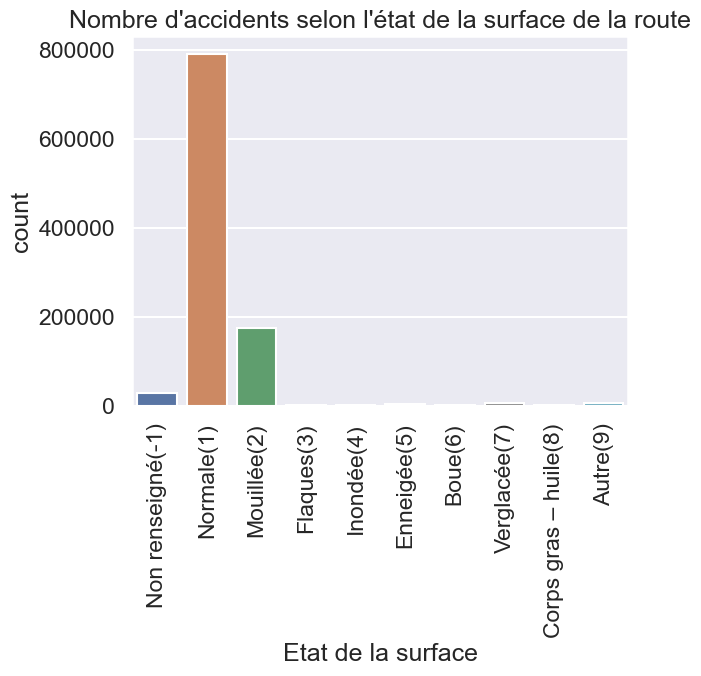

In [137]:
# Create count plot with surf on the x-axis
sns.countplot(x='surf', data=lieux)
plt.xticks(rotation="vertical")
plt.xlabel('Etat de la surface')
plt.title("Nombre d'accidents selon l'état de la surface de la route")
# Show plot
plt.show()

######  Variable **infra** (Aménagement - Infrastructure) :

  + -1 – Non renseigné
  + 0 – Aucun
  + 1 – Souterrain - tunnel
  + 2 – Pont - autopont
  + 3 – Bretelle d’échangeur ou de raccordement
  + 4 – Voie ferrée
  + 5 – Carrefour aménagé
  + 6 – Zone piétonne
  + 7 – Zone de péage
  + 8 – Chantier
  + 9 – Autres

In [138]:
lieux.infra.dtype

dtype('float64')

In [139]:
# Convert infra from flat to category
lieux['infra'] = lieux['infra'].astype('category')
# Write an assert statement confirming the change
assert lieux['infra'].dtype == 'category'

In [140]:
# Print new summary statistics 
lieux['infra'].describe()

count     1011901.0
unique         11.0
top             0.0
freq       898660.0
Name: infra, dtype: float64

In [141]:
lieux['infra'].value_counts(normalize=True)

0.0     0.888091
5.0     0.059224
3.0     0.015536
2.0     0.014440
1.0     0.008803
6.0     0.006828
4.0     0.003628
9.0     0.002297
7.0     0.000607
8.0     0.000502
-1.0    0.000044
Name: infra, dtype: float64

In [142]:
# Pourcentage de valeurs manquantes
lieux.plan.isna().sum()*100/lieux.shape[0]

0.2242189934425037

In [143]:
# Replace catagory number by category names
lieux['infra'].replace([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['Non renseigné(-1)', 'Aucun(0)', 'Souterrain - tunnel(1)', 
                        'Pont - autopont(2)', 'Bretelle d’échangeur ou de raccordement(3)', 'Voie ferrée(4)', 
                        'Carrefour aménagé(5)', 'Zone piétonne(6)', 'Zone de péage(7)', 'Chantier(8)', 'Autres(9)'],
                      inplace=True)

In [144]:
lieux['infra'].value_counts(normalize=True)

Aucun(0)                                      0.888091
Carrefour aménagé(5)                          0.059224
Bretelle d’échangeur ou de raccordement(3)    0.015536
Pont - autopont(2)                            0.014440
Souterrain - tunnel(1)                        0.008803
Zone piétonne(6)                              0.006828
Voie ferrée(4)                                0.003628
Autres(9)                                     0.002297
Zone de péage(7)                              0.000607
Chantier(8)                                   0.000502
Non renseigné(-1)                             0.000044
Name: infra, dtype: float64

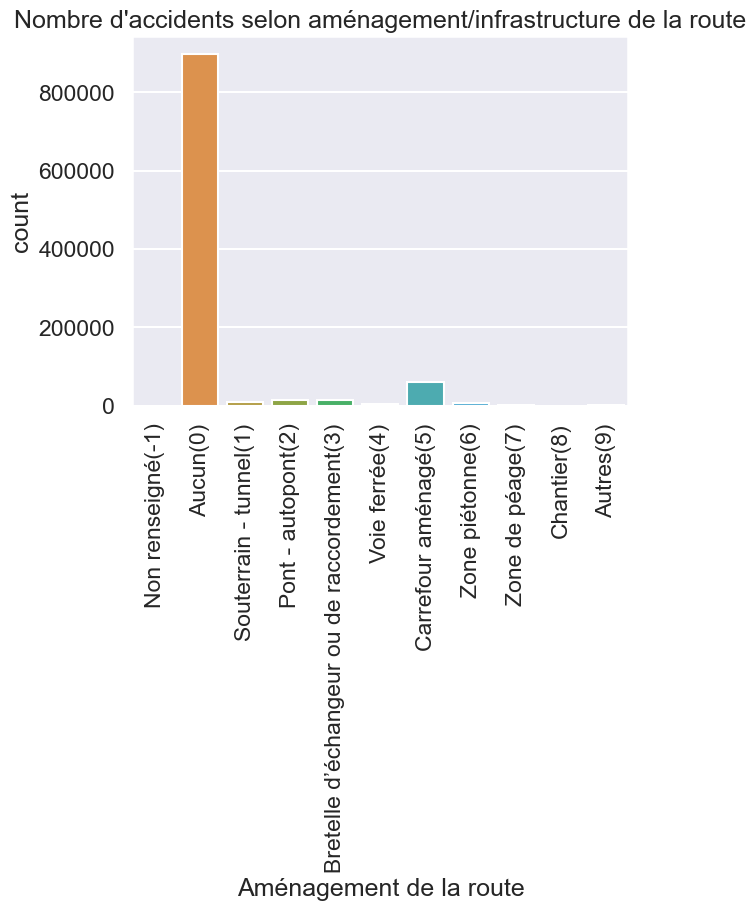

In [145]:
# Create count plot with infra on the x-axis
sns.countplot(x='infra', data=lieux)
plt.xticks(rotation=90)
plt.xlabel('Aménagement de la route')
plt.title("Nombre d'accidents selon aménagement/infrastructure de la route")
# Show plot
plt.show()

<div class="alert alert-warning">
    <font color=#FF0000><b>Constat </b></font>: Champ "Infra" rempli essentiellement par la valeur "Aucun". ***
</div>

###### Variable **situ** (Situation de l’accident) :
    -1 – Non renseigné
    0 – Aucun
    1 – Sur chaussée
    2 – Sur bande d’arrêt d’urgence
    3 – Sur accotement
    4 – Sur trottoir
    5 – Sur piste cyclable
    6 – Sur autre voie spéciale
    8 – Autres

In [146]:
lieux['situ'].dtype

dtype('float64')

In [147]:
# Convert situ from float to category
lieux['situ'] = lieux['situ'].astype('category')
# Write an assert statement confirming the change
assert lieux['situ'].dtype == 'category'

In [148]:
# Print new summary statistics 
lieux['situ'].describe()

count     1012339.0
unique          9.0
top             1.0
freq       851753.0
Name: situ, dtype: float64

In [149]:
lieux['situ'].value_counts().sort_index()

-1.0       116
0.0      47458
1.0     851753
2.0       7386
3.0      80604
4.0      17011
5.0       6414
6.0        443
8.0       1154
Name: situ, dtype: int64

In [150]:
# Pourcentage de valeurs manquantes
lieux.situ.isna().sum()*100/lieux.shape[0]

0.4885437954446486

In [151]:
# Replace catagory number by category names
lieux['situ'].replace([-1, 0, 1, 2, 3, 4, 5, 6, 8], ['Non renseigné(-1)', 'Aucun(0)', 'Sur chaussée(1)', 
                        'Sur bande d’arrêt d’urgence(2)', 'Sur accotement(3)', 'Sur trottoir(4)', 
                        'Sur piste cyclable(5)', 'Sur autre voie spéciale(6)', 'Autres(8)'],
                     inplace=True)

In [152]:
lieux['situ'].value_counts(normalize=True)

Sur chaussée(1)                   0.841371
Sur accotement(3)                 0.079622
Aucun(0)                          0.046880
Sur trottoir(4)                   0.016804
Sur bande d’arrêt d’urgence(2)    0.007296
Sur piste cyclable(5)             0.006336
Autres(8)                         0.001140
Sur autre voie spéciale(6)        0.000438
Non renseigné(-1)                 0.000115
Name: situ, dtype: float64

In [153]:
lieux.situ.unique().to_numpy()

array(['Sur chaussée(1)', 'Sur piste cyclable(5)', 'Sur accotement(3)',
       'Sur trottoir(4)', 'Aucun(0)', 'Sur bande d’arrêt d’urgence(2)',
       nan, 'Sur autre voie spéciale(6)', 'Autres(8)',
       'Non renseigné(-1)'], dtype=object)

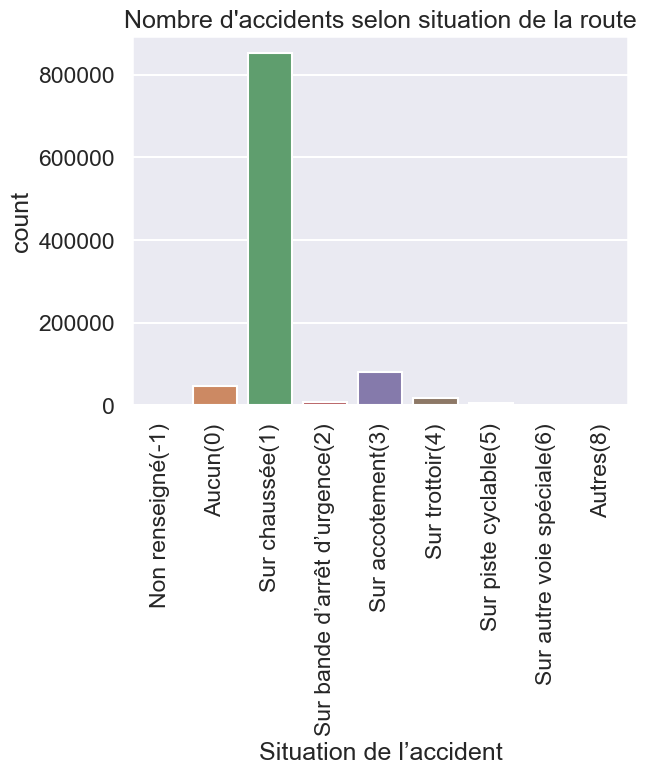

In [154]:
# Create count plot with situ on the x-axis
sns.countplot(x='situ', data=lieux)
plt.xticks(rotation='vertical')
plt.xlabel("Situation de l’accident")
plt.title("Nombre d'accidents selon situation de la route")
# Show plot
plt.show()

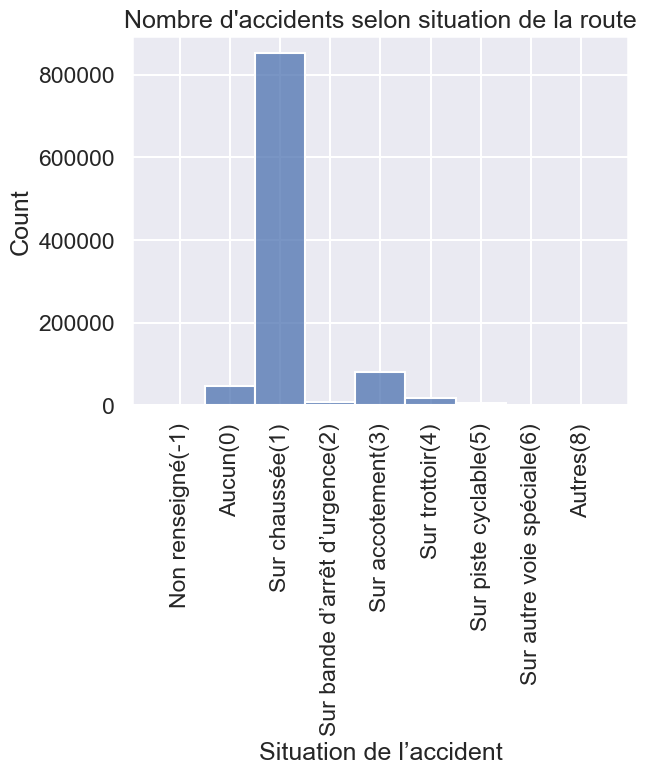

In [156]:
sns.histplot(data=lieux, x='situ', binwidth=1)
plt.xticks(rotation='vertical')
plt.xlabel("Situation de l’accident")
plt.title("Nombre d'accidents selon situation de la route")
plt.show()

###### Variable **env1** 

In [157]:
lieux.env1.dtype

dtype('float64')

In [158]:
lieux.env1.unique()

array([ 0.,  3., 99., nan])

In [159]:
# Convert env1 from float to category étant donné qu'il comporte 4 valeurs
lieux.env1 = lieux.env1.astype('category')
# Write an assert statement confirming the change
assert lieux.env1.dtype == 'category'

In [160]:
lieux.env1.describe()

count     953029.0
unique         3.0
top            0.0
freq      541532.0
Name: env1, dtype: float64

In [161]:
# Pourcentage de valeurs manquantes
lieux.env1.isna().sum()*100/lieux.shape[0]

6.31863081915131

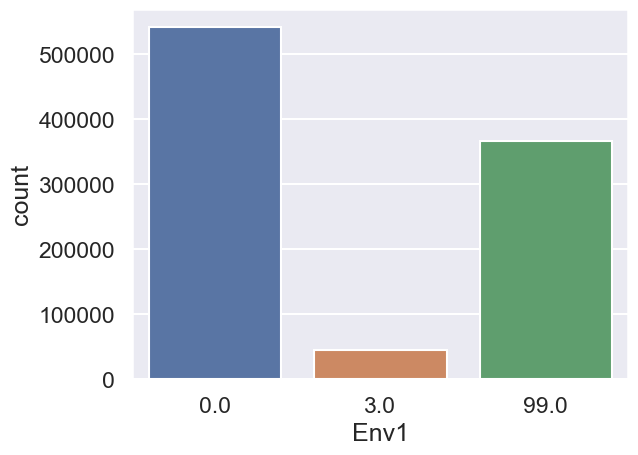

In [162]:
# Create count plot with situ on the x-axis
sns.countplot(x='env1', data=lieux)
plt.xlabel("Env1")
# Show plot
plt.show()

###### Variable **annee** 
année de l'accident

In [163]:
lieux.annee.dtype

dtype('int64')

In [164]:
lieux.annee.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

In [165]:
lieux.annee = pd.to_datetime(lieux.annee, format='%Y')

In [166]:
lieux.annee.dtype

dtype('<M8[ns]')

In [167]:
lieux.dtypes


Unnamed: 0             int64
num_acc                int64
catr                category
voie                  object
v1                  category
v2                    object
circ                category
nbv                  float64
pr                    object
pr1                  float64
vosp                category
prof                category
plan                category
lartpc               float64
larrout              float64
surf                category
infra               category
situ                category
env1                category
annee         datetime64[ns]
vma                  float64
dtype: object

In [168]:
lieux.annee.value_counts(normalize=True).round(2)

2005-01-01    0.09
2007-01-01    0.08
2006-01-01    0.08
2008-01-01    0.08
2009-01-01    0.07
2010-01-01    0.07
2011-01-01    0.07
2012-01-01    0.06
2017-01-01    0.06
2014-01-01    0.06
2016-01-01    0.06
2019-01-01    0.06
2015-01-01    0.06
2013-01-01    0.06
2018-01-01    0.06
Name: annee, dtype: float64

In [169]:
lieux.annee.min()

Timestamp('2005-01-01 00:00:00')

In [170]:
lieux.annee.max()

Timestamp('2019-01-01 00:00:00')

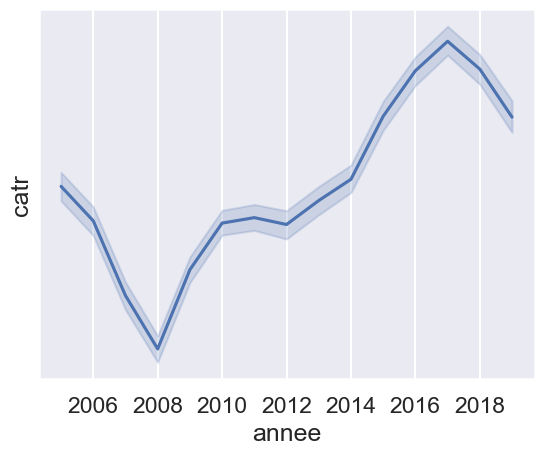

In [171]:
# Create a line plot showing the average number of categorie de route by year
sns.lineplot(data=lieux, x="annee", y="catr")
plt.show()

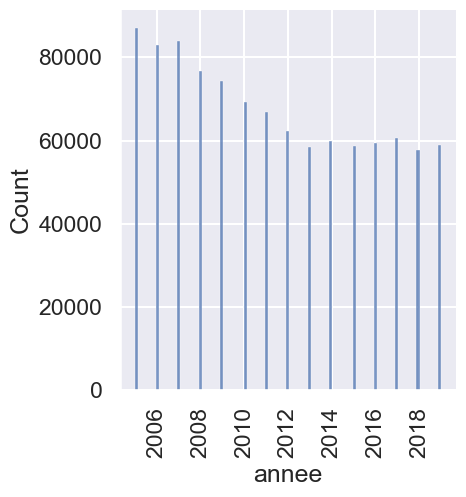

In [172]:
# graphique 
sns.displot(lieux.annee)
plt.xticks(rotation=90);

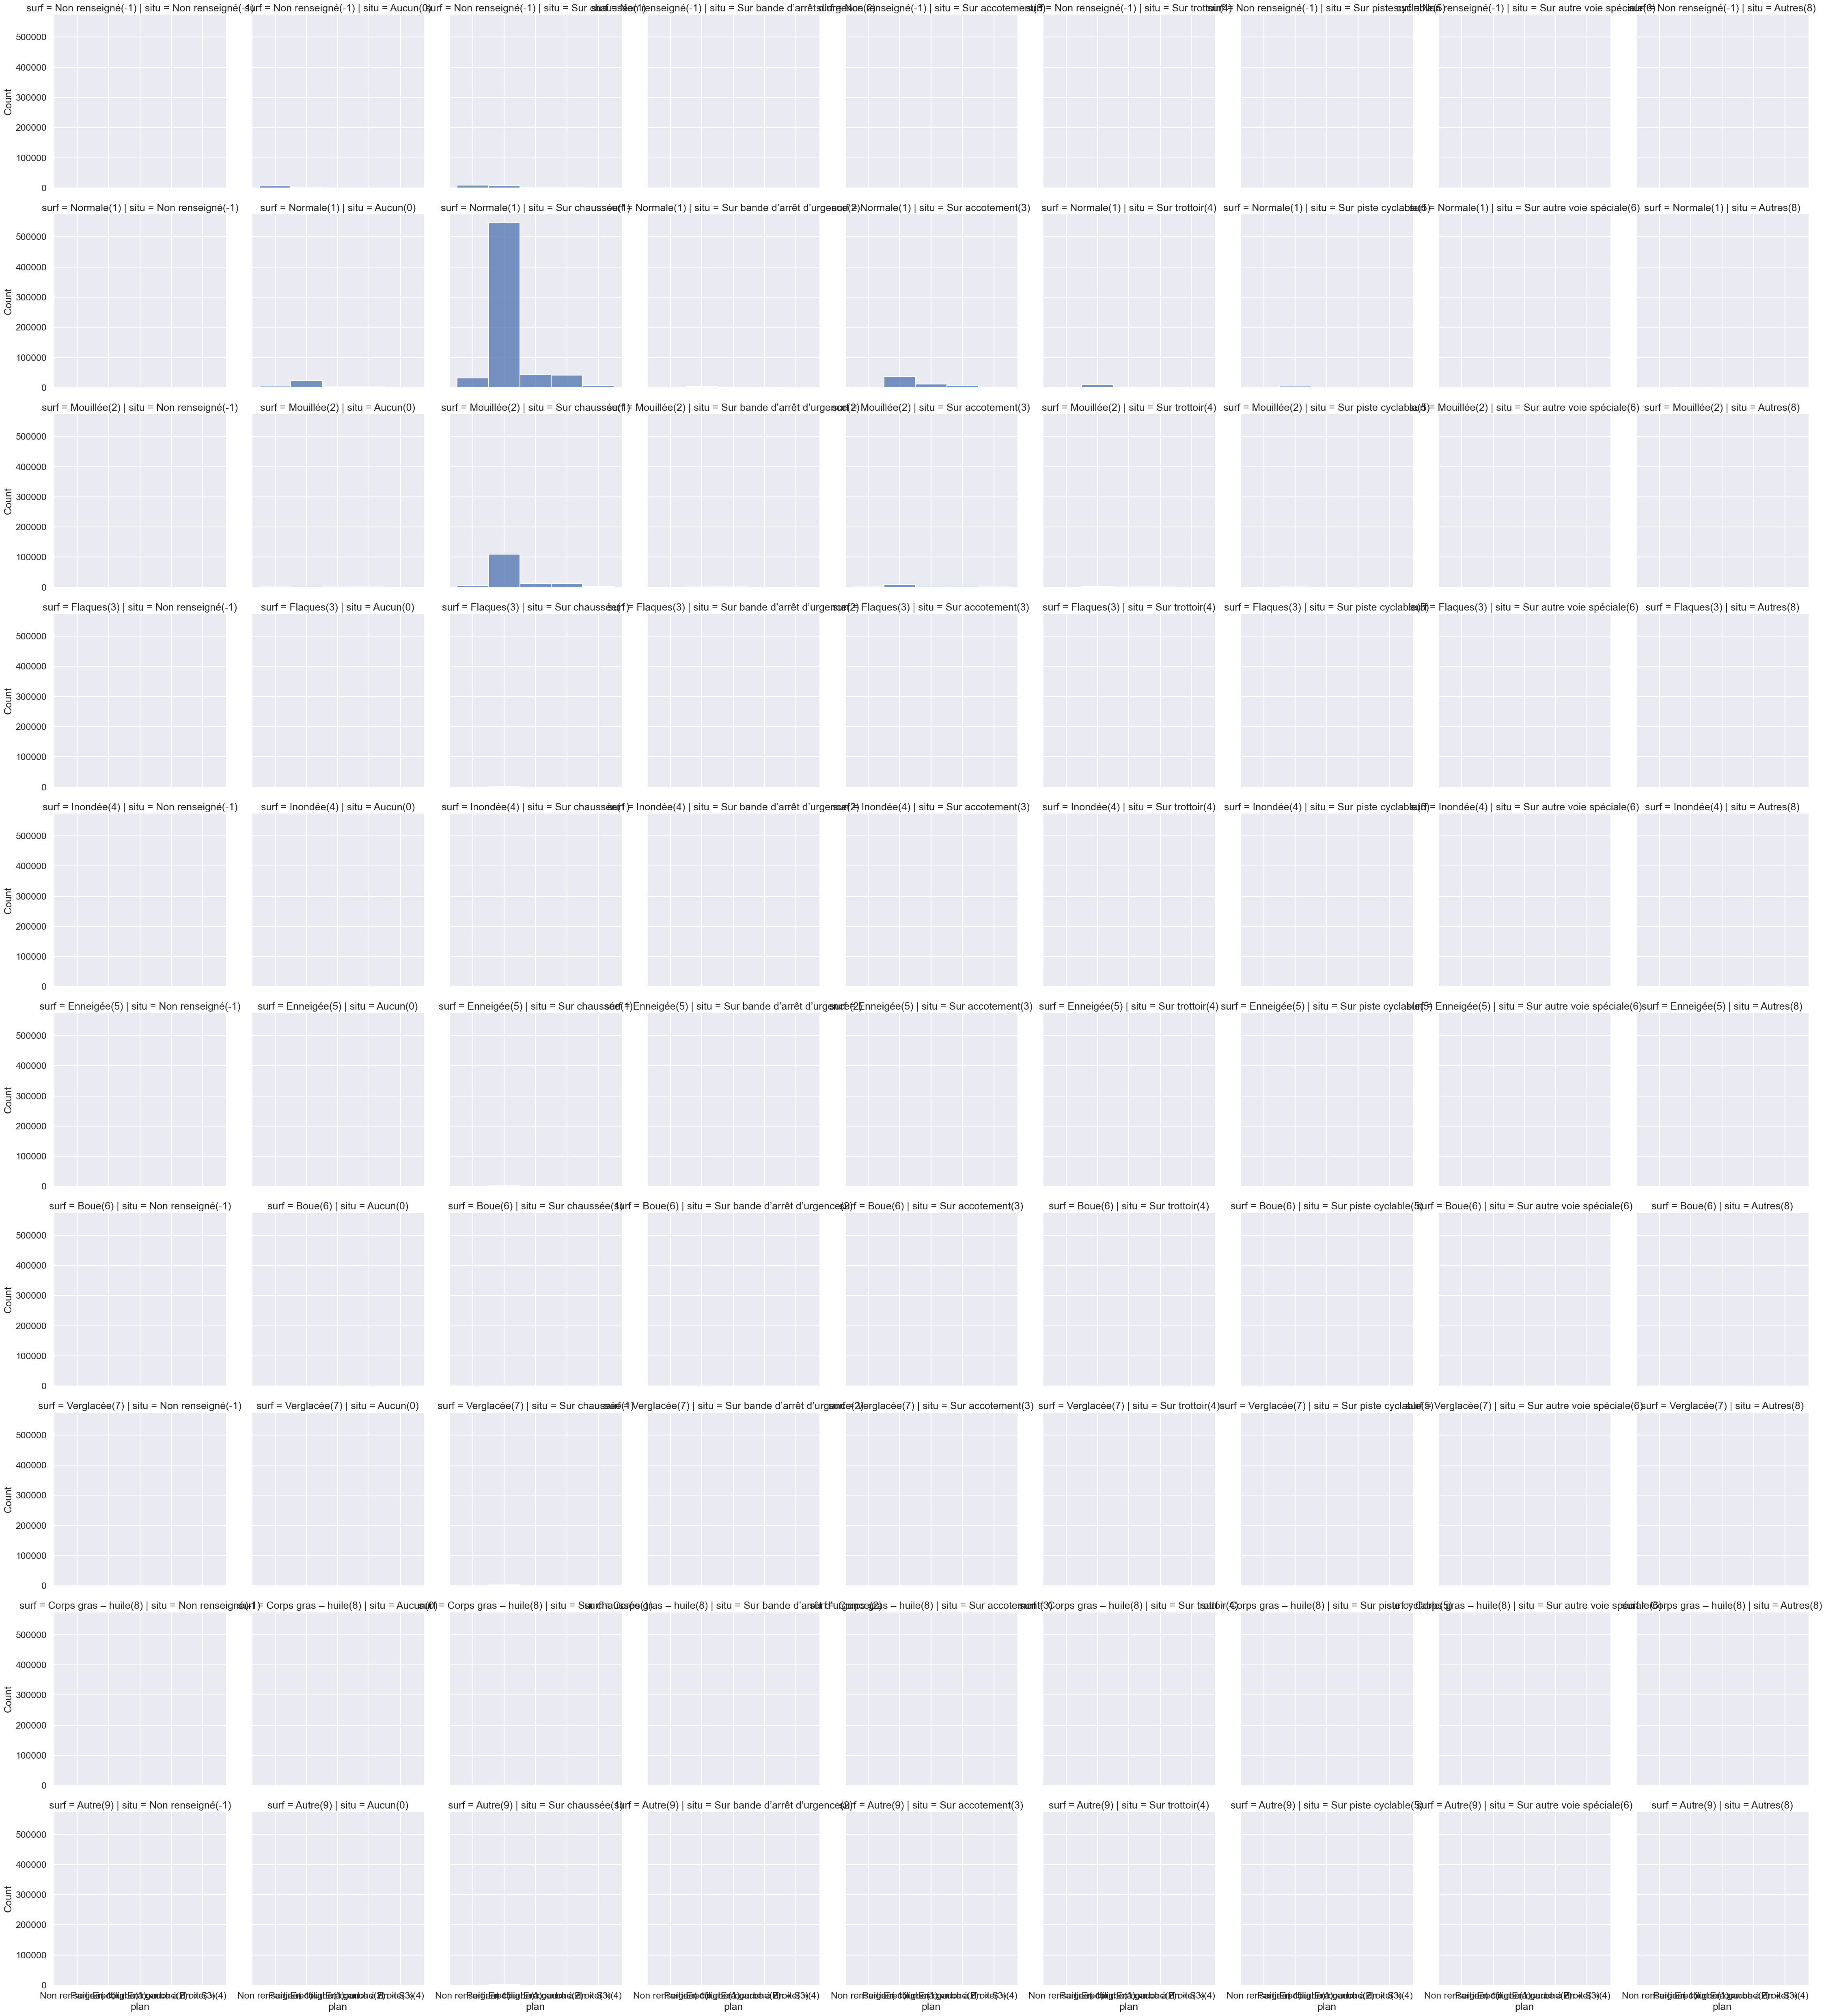

In [173]:
sns.displot(lieux, x='plan', col='situ', row='surf');

###### Variable **vma** 
pour la Vitesse maximale autorisée sur le lieu et au moment de l’accident

In [174]:
lieux.vma.dtype

dtype('float64')

In [175]:
lieux.vma.describe()

count    58840.000000
mean        59.921669
std         23.960359
min         -1.000000
25%         50.000000
50%         50.000000
75%         80.000000
max        800.000000
Name: vma, dtype: float64

In [176]:
# Pourcentage de valeurs manquantes
lieux.vma.isna().sum()*100/lieux.shape[0]

94.21611329497723

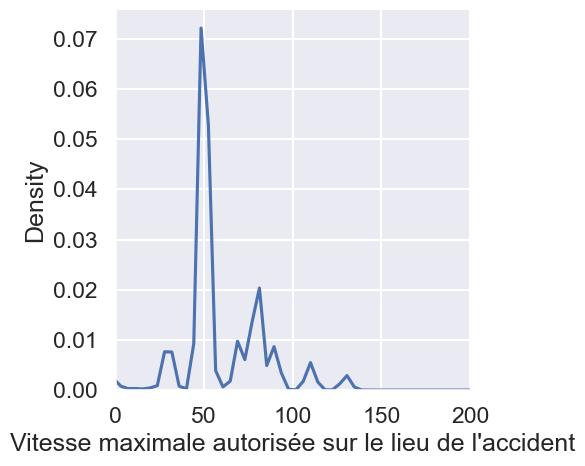

In [177]:
sns.displot(lieux.vma, kind="kde")
plt.xlim((0, 200))
plt.xlabel("Vitesse maximale autorisée sur le lieu de l'accident")
plt.show()

constat : présence d'une grande quantité (94%) de valeurs manquantes.

#### Gestion des doublons

In [178]:
# Drop complete duplicates from lieux
lieux.drop_duplicates(keep=False, inplace=True)

In [179]:
lieux.shape

(1017309, 21)

In [196]:
# checking the unique data types
lieux.dtypes.unique()

array([dtype('int64'),
       CategoricalDtype(categories=['1-Autoroute', '2-Route nationale', '3-Route Départementale',
                         '4-Voie Communales', '5-Hors réseau public',
                         '6-Parc de stationnement ouvert à la circulation publique',
                         '7-Routes de métropole urbaine', '9-Autres'],
       , ordered=False)                                                                          ,
       dtype('O'),
       CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], ordered=False),
       CategoricalDtype(categories=['Non renseigné(-1)', 'A sens unique(1)',
                         'Bidirectionnelle(2)', 'A chaussées séparées(3)',
                         'Avec voies d’affectation variable(4)'],
       , ordered=False)                                                     ,
       dtype('float64'),
       CategoricalDtype(categories=['Non renseigné(-1)', 'Sans objet(0)', 'Piste cyclable(1)',
                     

#### Gestion des valeurs manquantes

In [180]:
# Count the number of missing values
lieux.isna().sum().sort_values()

Unnamed: 0          0
num_acc             0
annee               0
catr                1
circ             1574
surf             1924
prof             1949
plan             2281
nbv              2731
vosp             2761
situ             4970
infra            5408
env1            64280
voie            91846
larrout        112841
lartpc         114827
pr             475484
pr1            484902
vma            958469
v2             973794
v1            1009417
dtype: int64

In [181]:
size = lieux.shape

# Count the number of missing values in each column
nan_values = lieux.isna().sum()

nan_values = nan_values.sort_values(ascending=True)*100/size[0]

nan_values

Unnamed: 0     0.000000
num_acc        0.000000
annee          0.000000
catr           0.000098
circ           0.154722
surf           0.189126
prof           0.191584
plan           0.224219
nbv            0.268453
vosp           0.271402
situ           0.488544
infra          0.531599
env1           6.318631
voie           9.028329
larrout       11.092107
lartpc        11.287328
pr            46.739388
pr1           47.665164
vma           94.216113
v2            95.722539
v1            99.224228
dtype: float64

In [182]:
# Count the number of missing values in each column
nan_values.round(2)

Unnamed: 0     0.00
num_acc        0.00
annee          0.00
catr           0.00
circ           0.15
surf           0.19
prof           0.19
plan           0.22
nbv            0.27
vosp           0.27
situ           0.49
infra          0.53
env1           6.32
voie           9.03
larrout       11.09
lartpc        11.29
pr            46.74
pr1           47.67
vma           94.22
v2            95.72
v1            99.22
dtype: float64

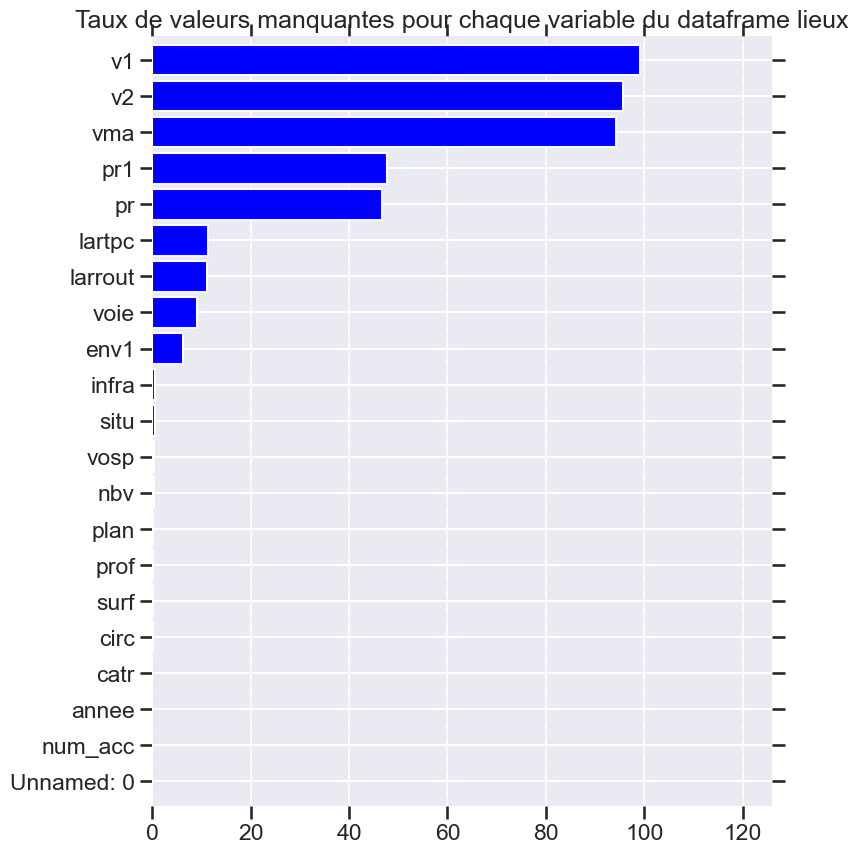

In [183]:
ax = nan_values.plot(kind='barh', 
                     figsize=(8, 10), 
                     color='#0000FF',
                     zorder=2,
                     width=0.85)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", 
               which="both", 
               bottom="off", 
               top="off", 
               labelbottom="on", 
               left="off", 
               right="off", 
               labelleft="on")
ax.set_title("Taux de valeurs manquantes pour chaque variable du dataframe lieux")
vals = ax.get_xticks()

for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

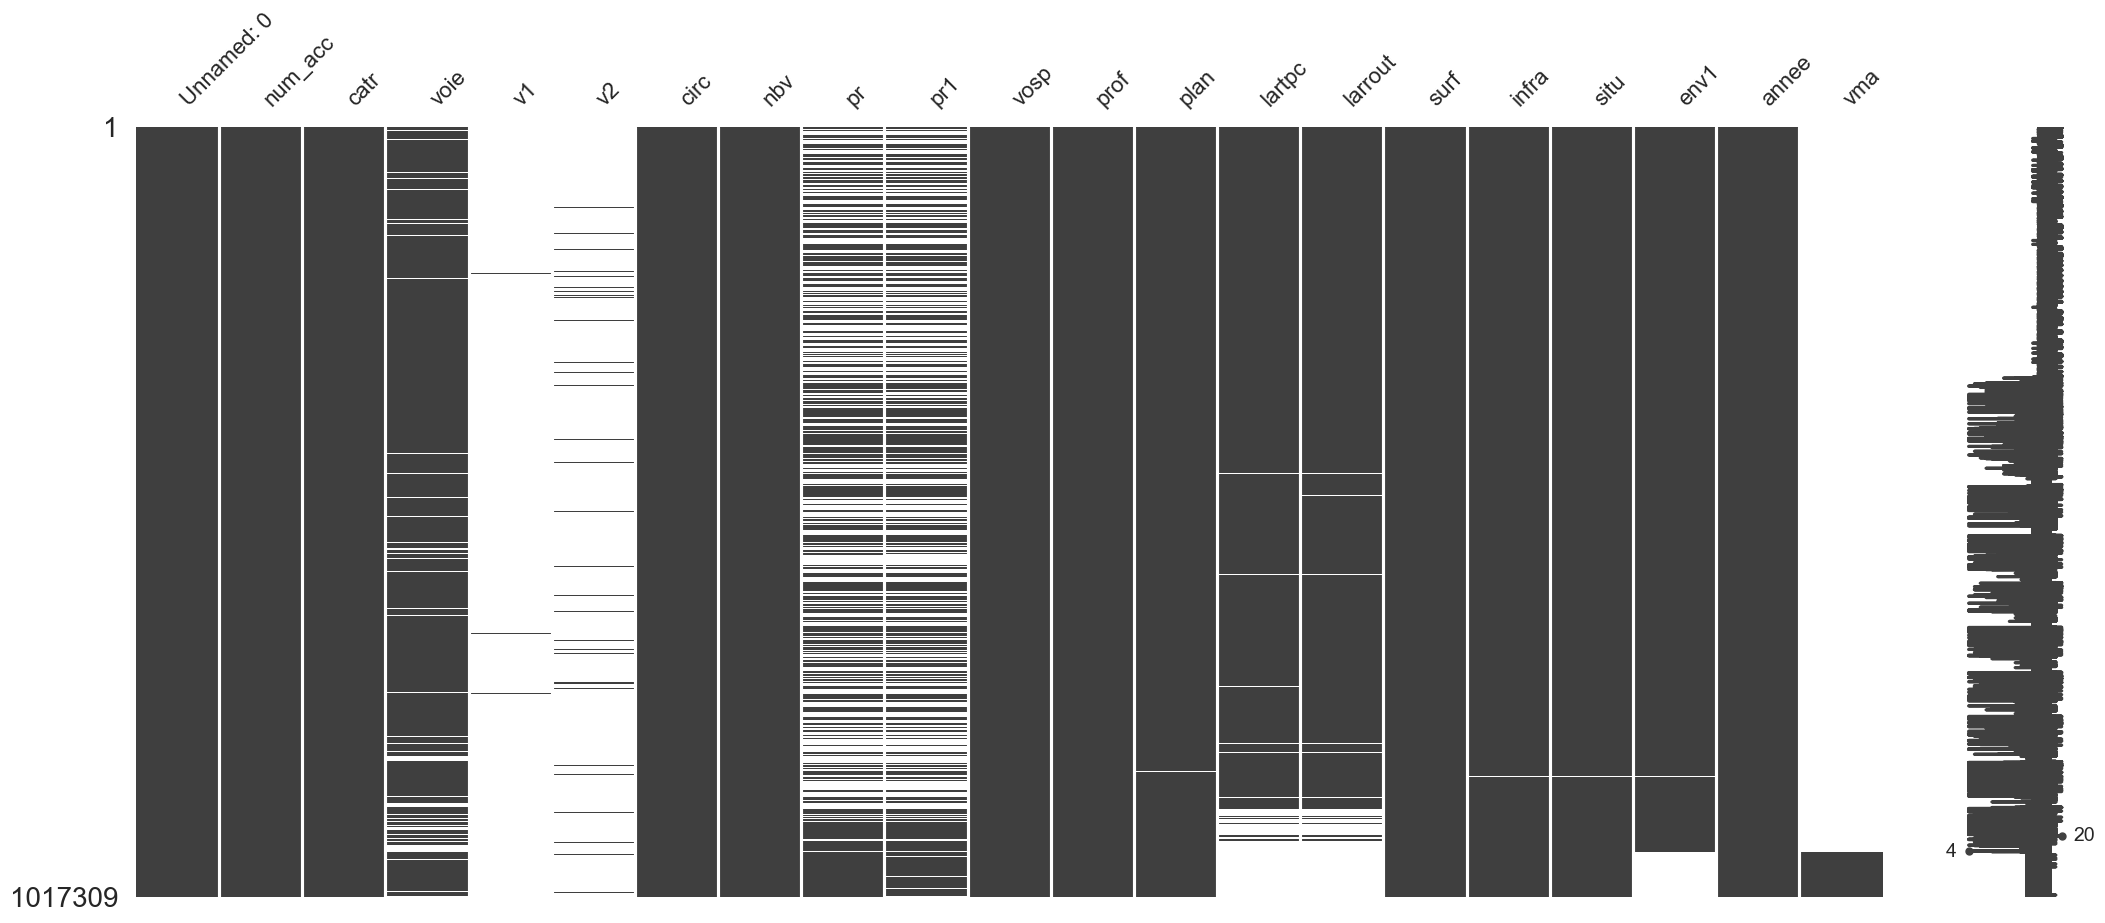

In [186]:
## Plot nullity matrix of lieux
fig = msno.matrix(lieux)

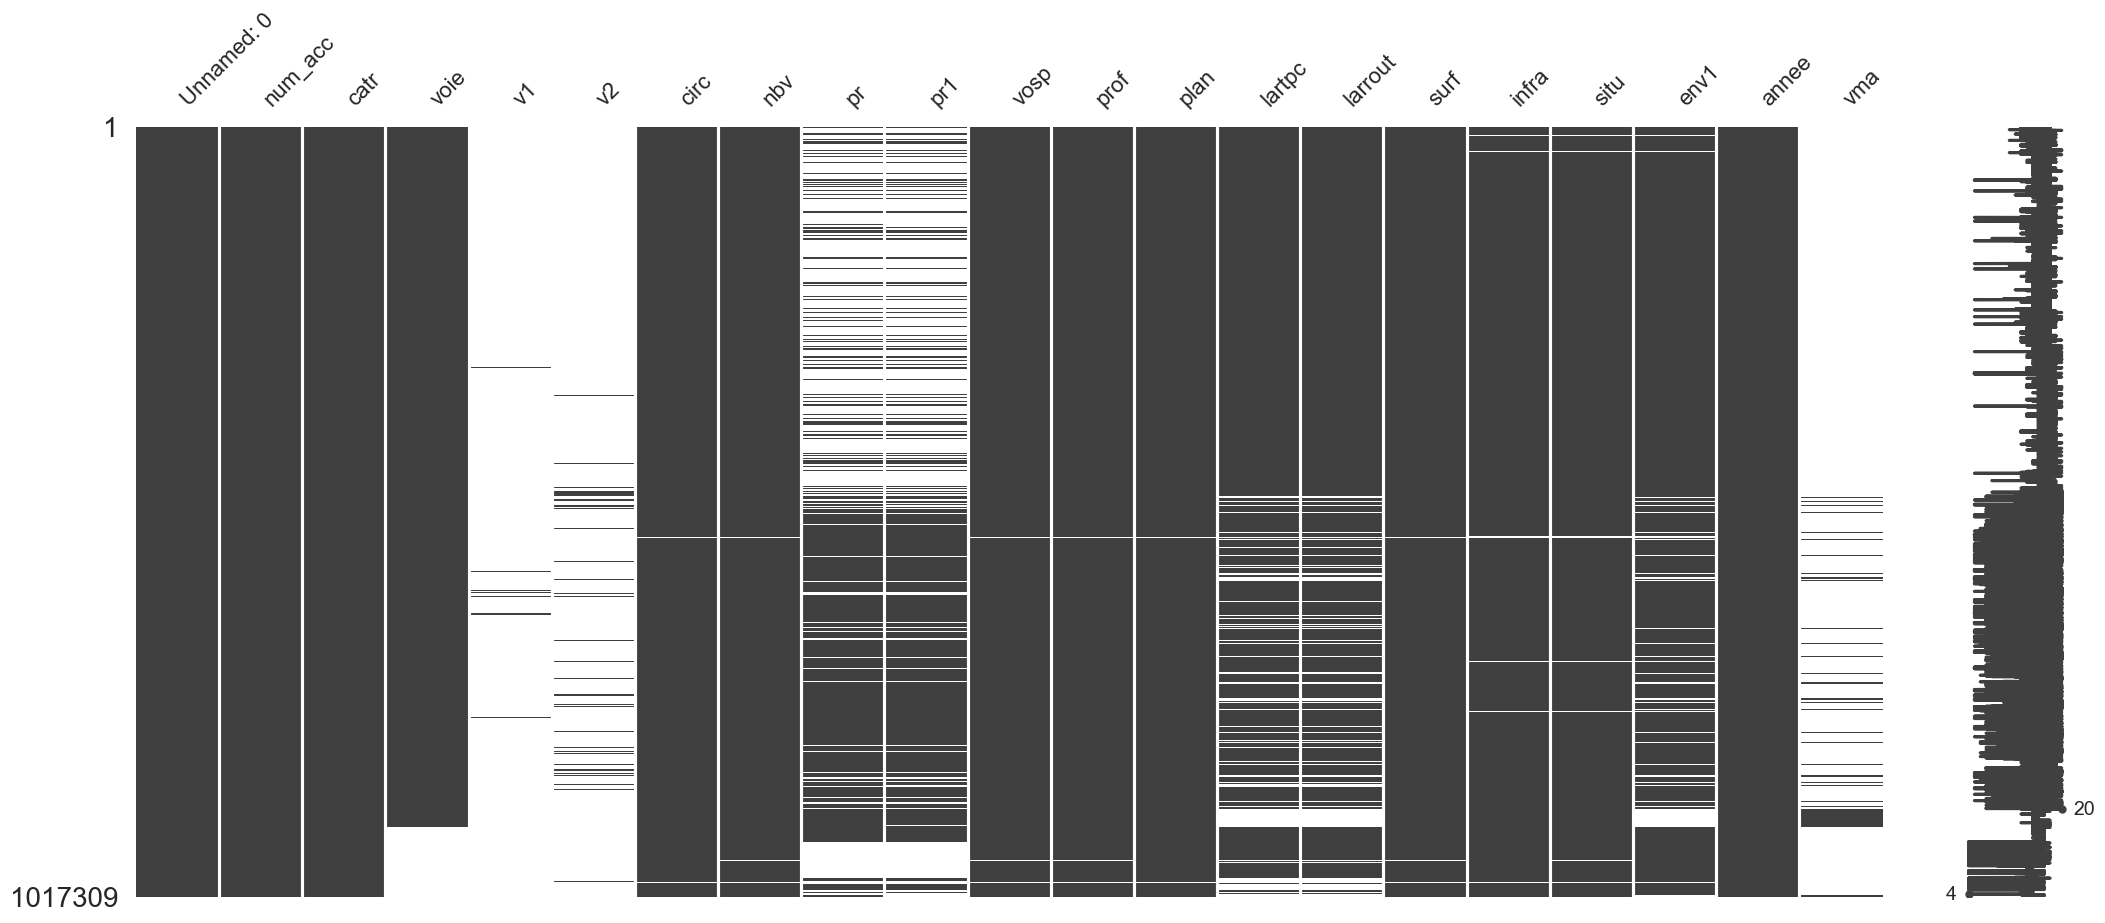

In [187]:
## Plot nullity matrix of lieux sorted by column 'voie' values
fig = msno.matrix(lieux.sort_values("voie"))

<div class="alert alert-warning">
    Constat : Lorsque la 'voie' n'est pas renseignée, 'v1' n'est pas non plus renseigné. Cependant, 'v2', 'pr', 'pr1' et 'vma' sont très faiblement rensignés.
</div>

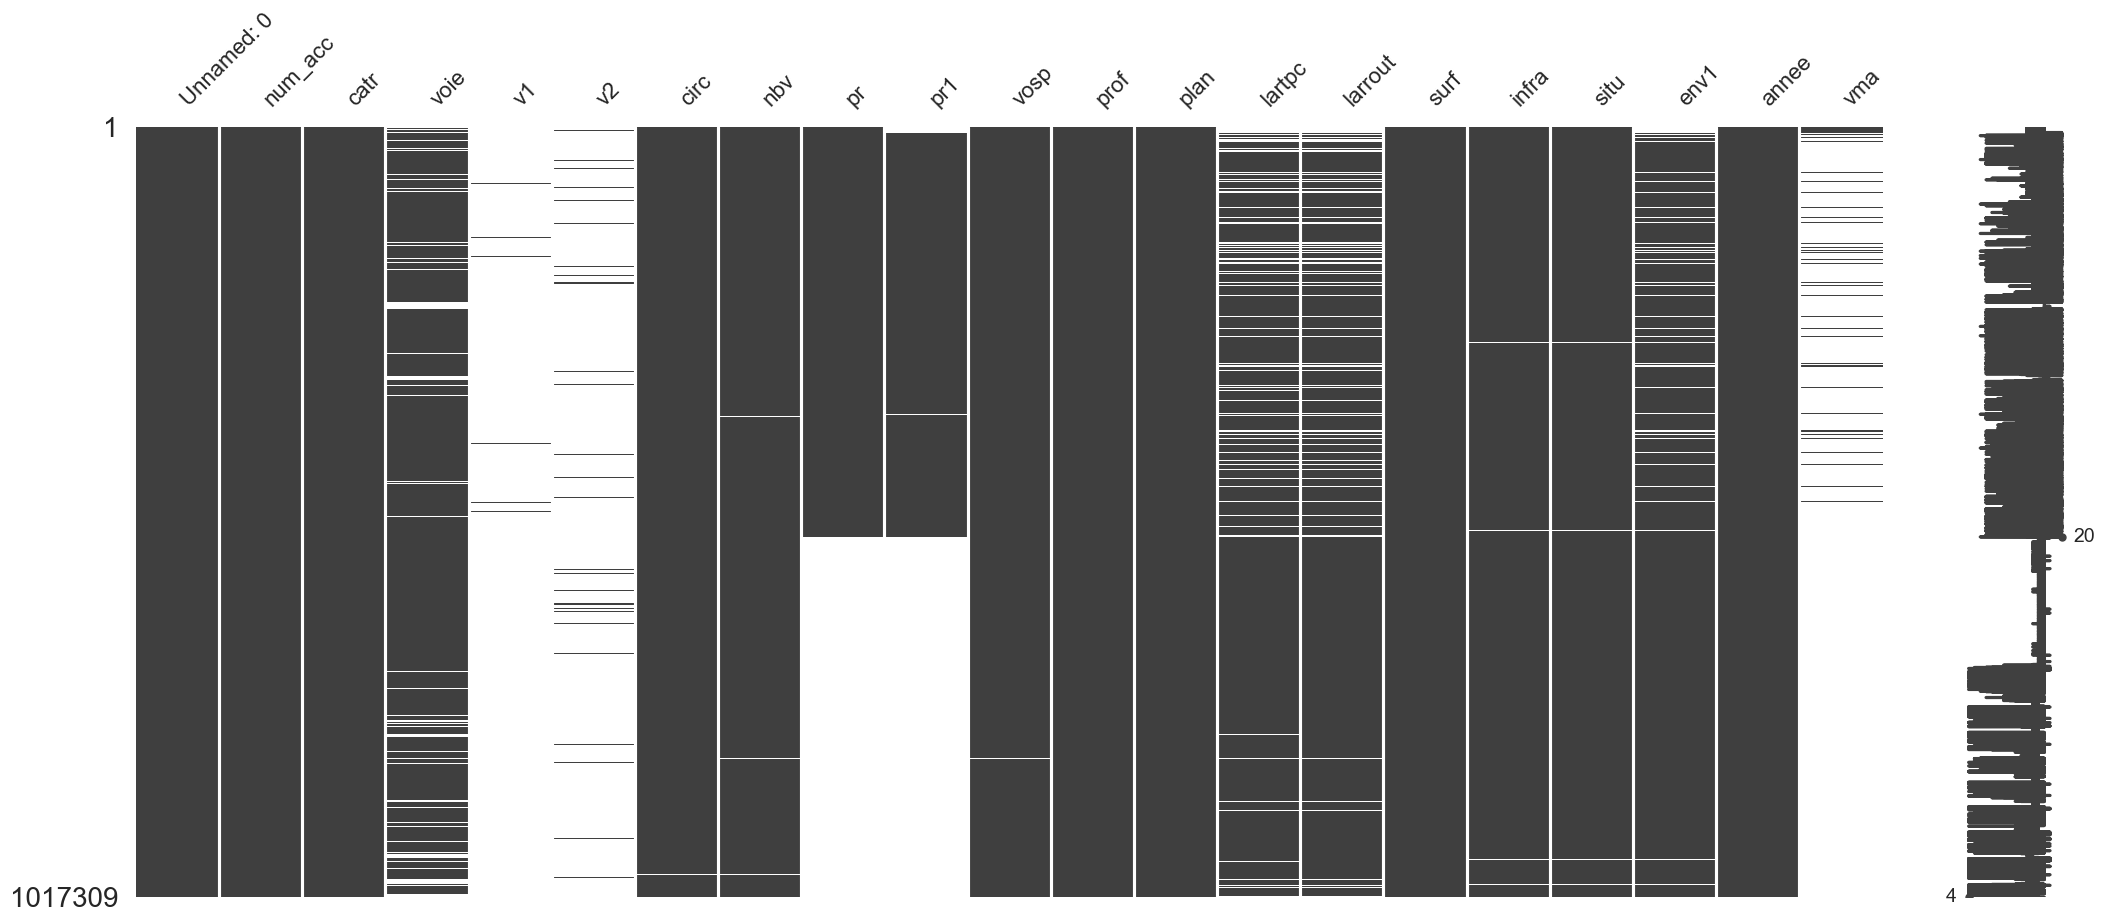

In [188]:
## Plot nullity matrix of lieux sorted by column 'pr' values
fig = msno.matrix(lieux.sort_values("pr"))

<div class="alert alert-warning">
    Constat : Lorsque 'pr' n'est pas renseigné, 'pr1' n'est pas non plus renseigné, ainsi que 'v1' t 'vma'. Et 'v2' est très faiblement rensigné.
</div>

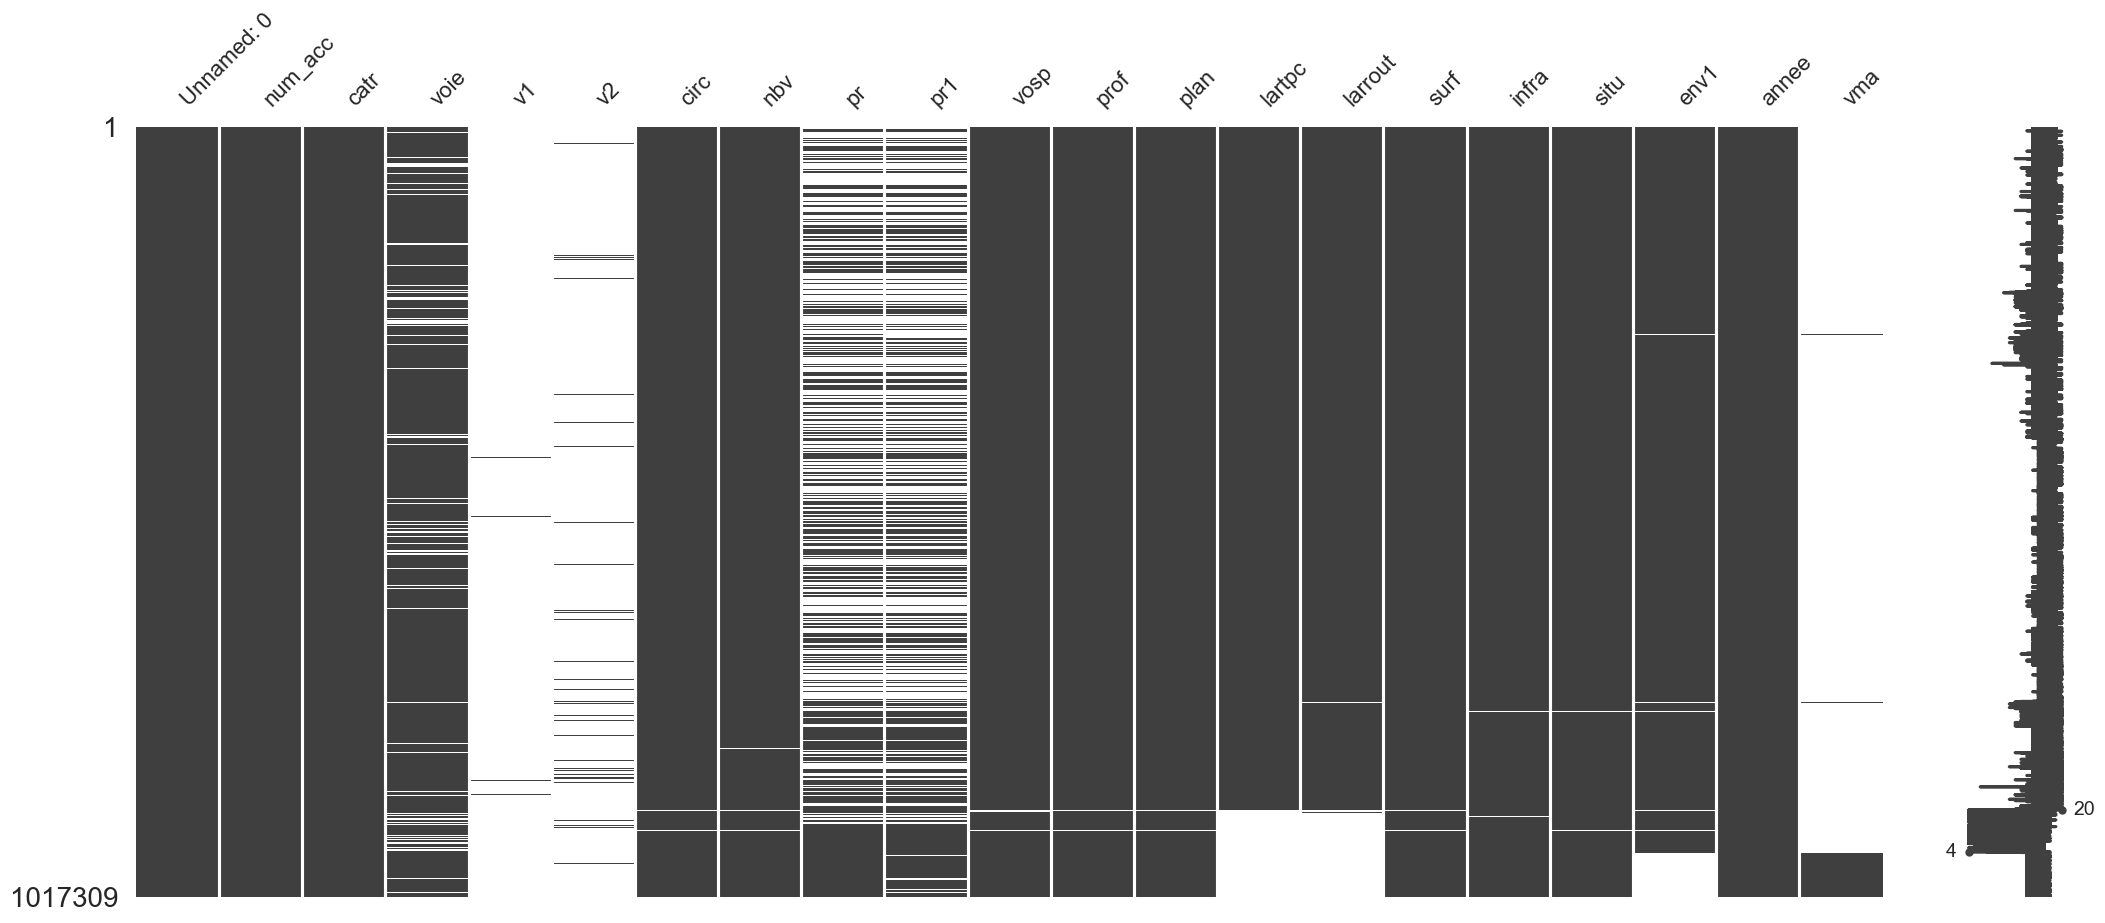

In [189]:
## Plot nullity matrix of lieux sorted by column 'lartpc' values
fig = msno.matrix(lieux.sort_values("lartpc"))

<div class="alert alert-warning">
    Constat : Lorsque la 'lartpc' n'est pas renseignée, 'larrout' n'est pas non plus renseigné, de même que 'v1'. Cependant, 'vma' semble être renseigné, ainsi qu 'pr' et 'pr1'.
    'v2' reste très faiblement rensigné.
</div>

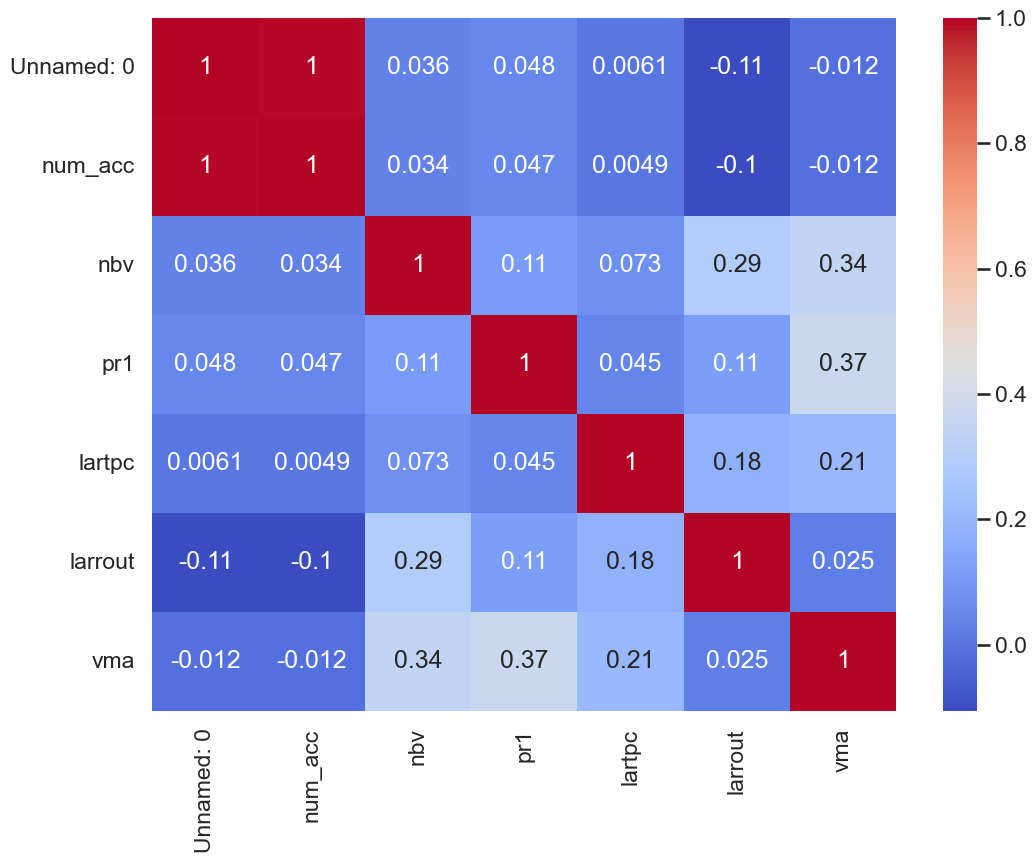

In [191]:
correlation_matrix = lieux.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')#crest
plt.show();

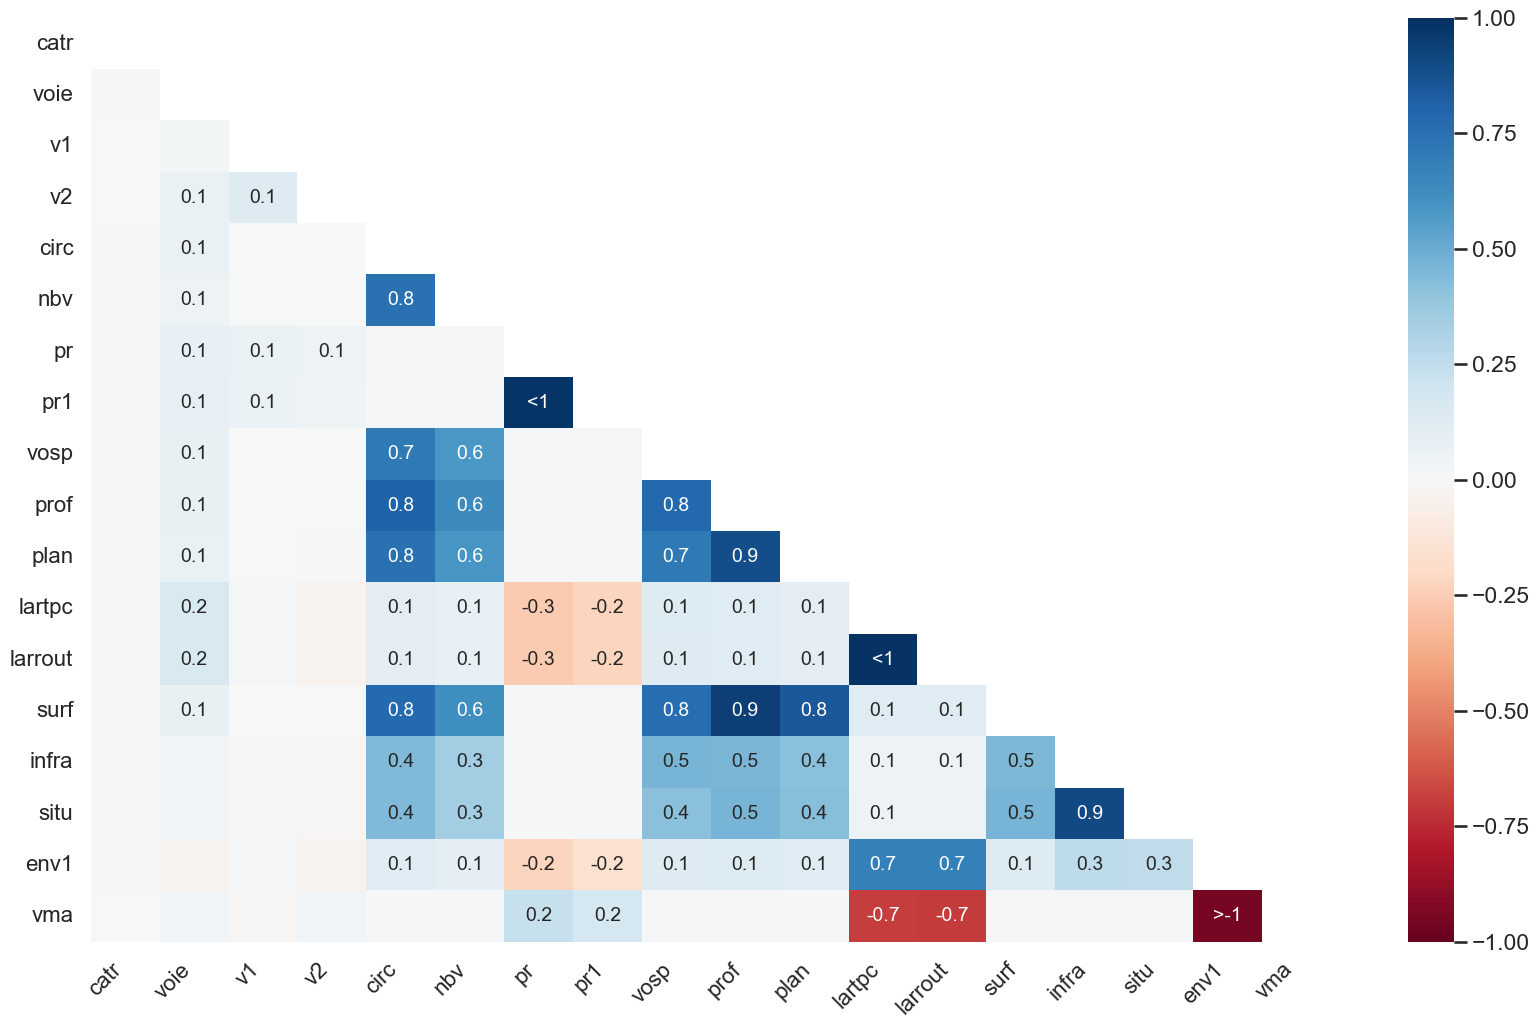

In [192]:
# Finding correlations in your data
# Une heatmap de corrélations entre toutes les variables du DataFrame permet de repérer les variables importantes 
#   et celles colinéaires entre elles.
# Plot missingness heatmap of lieux
msno.heatmap(lieux);

<div class="alert alert-info">
Les variables les plus correlées entre elles sont :
 - situ et infra
 - surf et prof
 - plan et prof
    
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

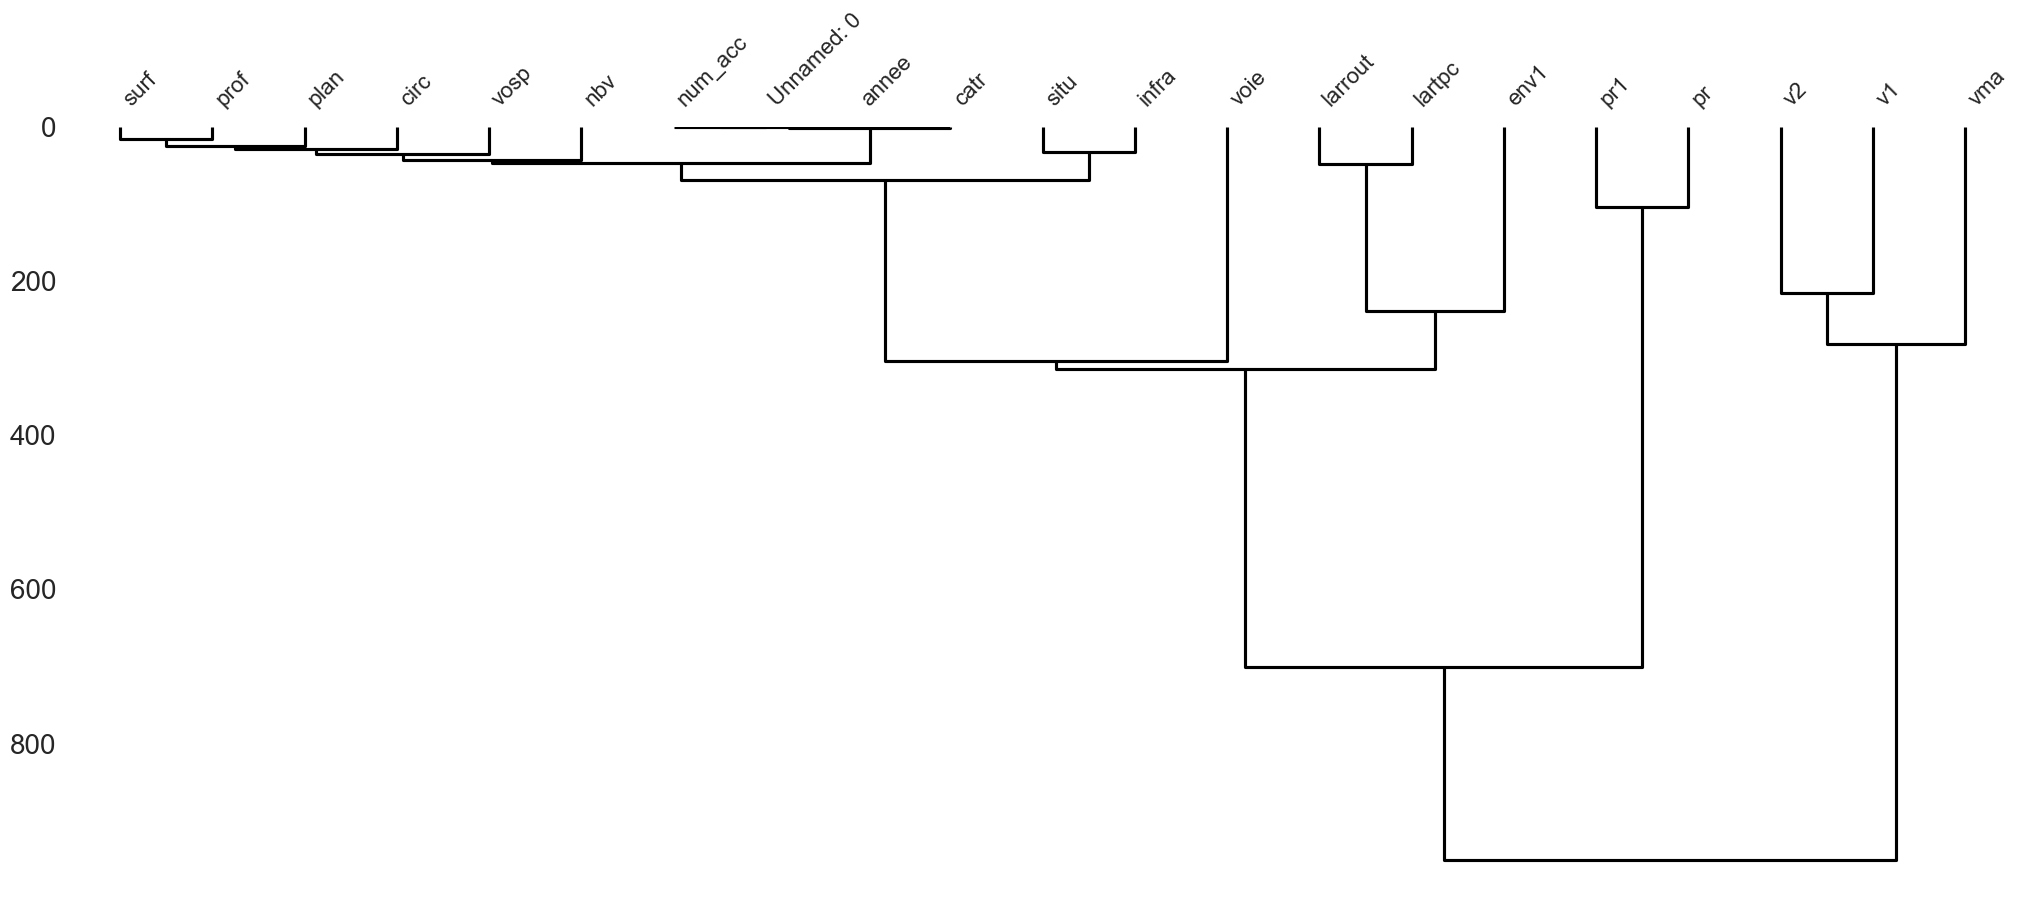

In [193]:
# dendrogramme
# Plot missingness dendrogram of lieux
msno.dendrogram(lieux);

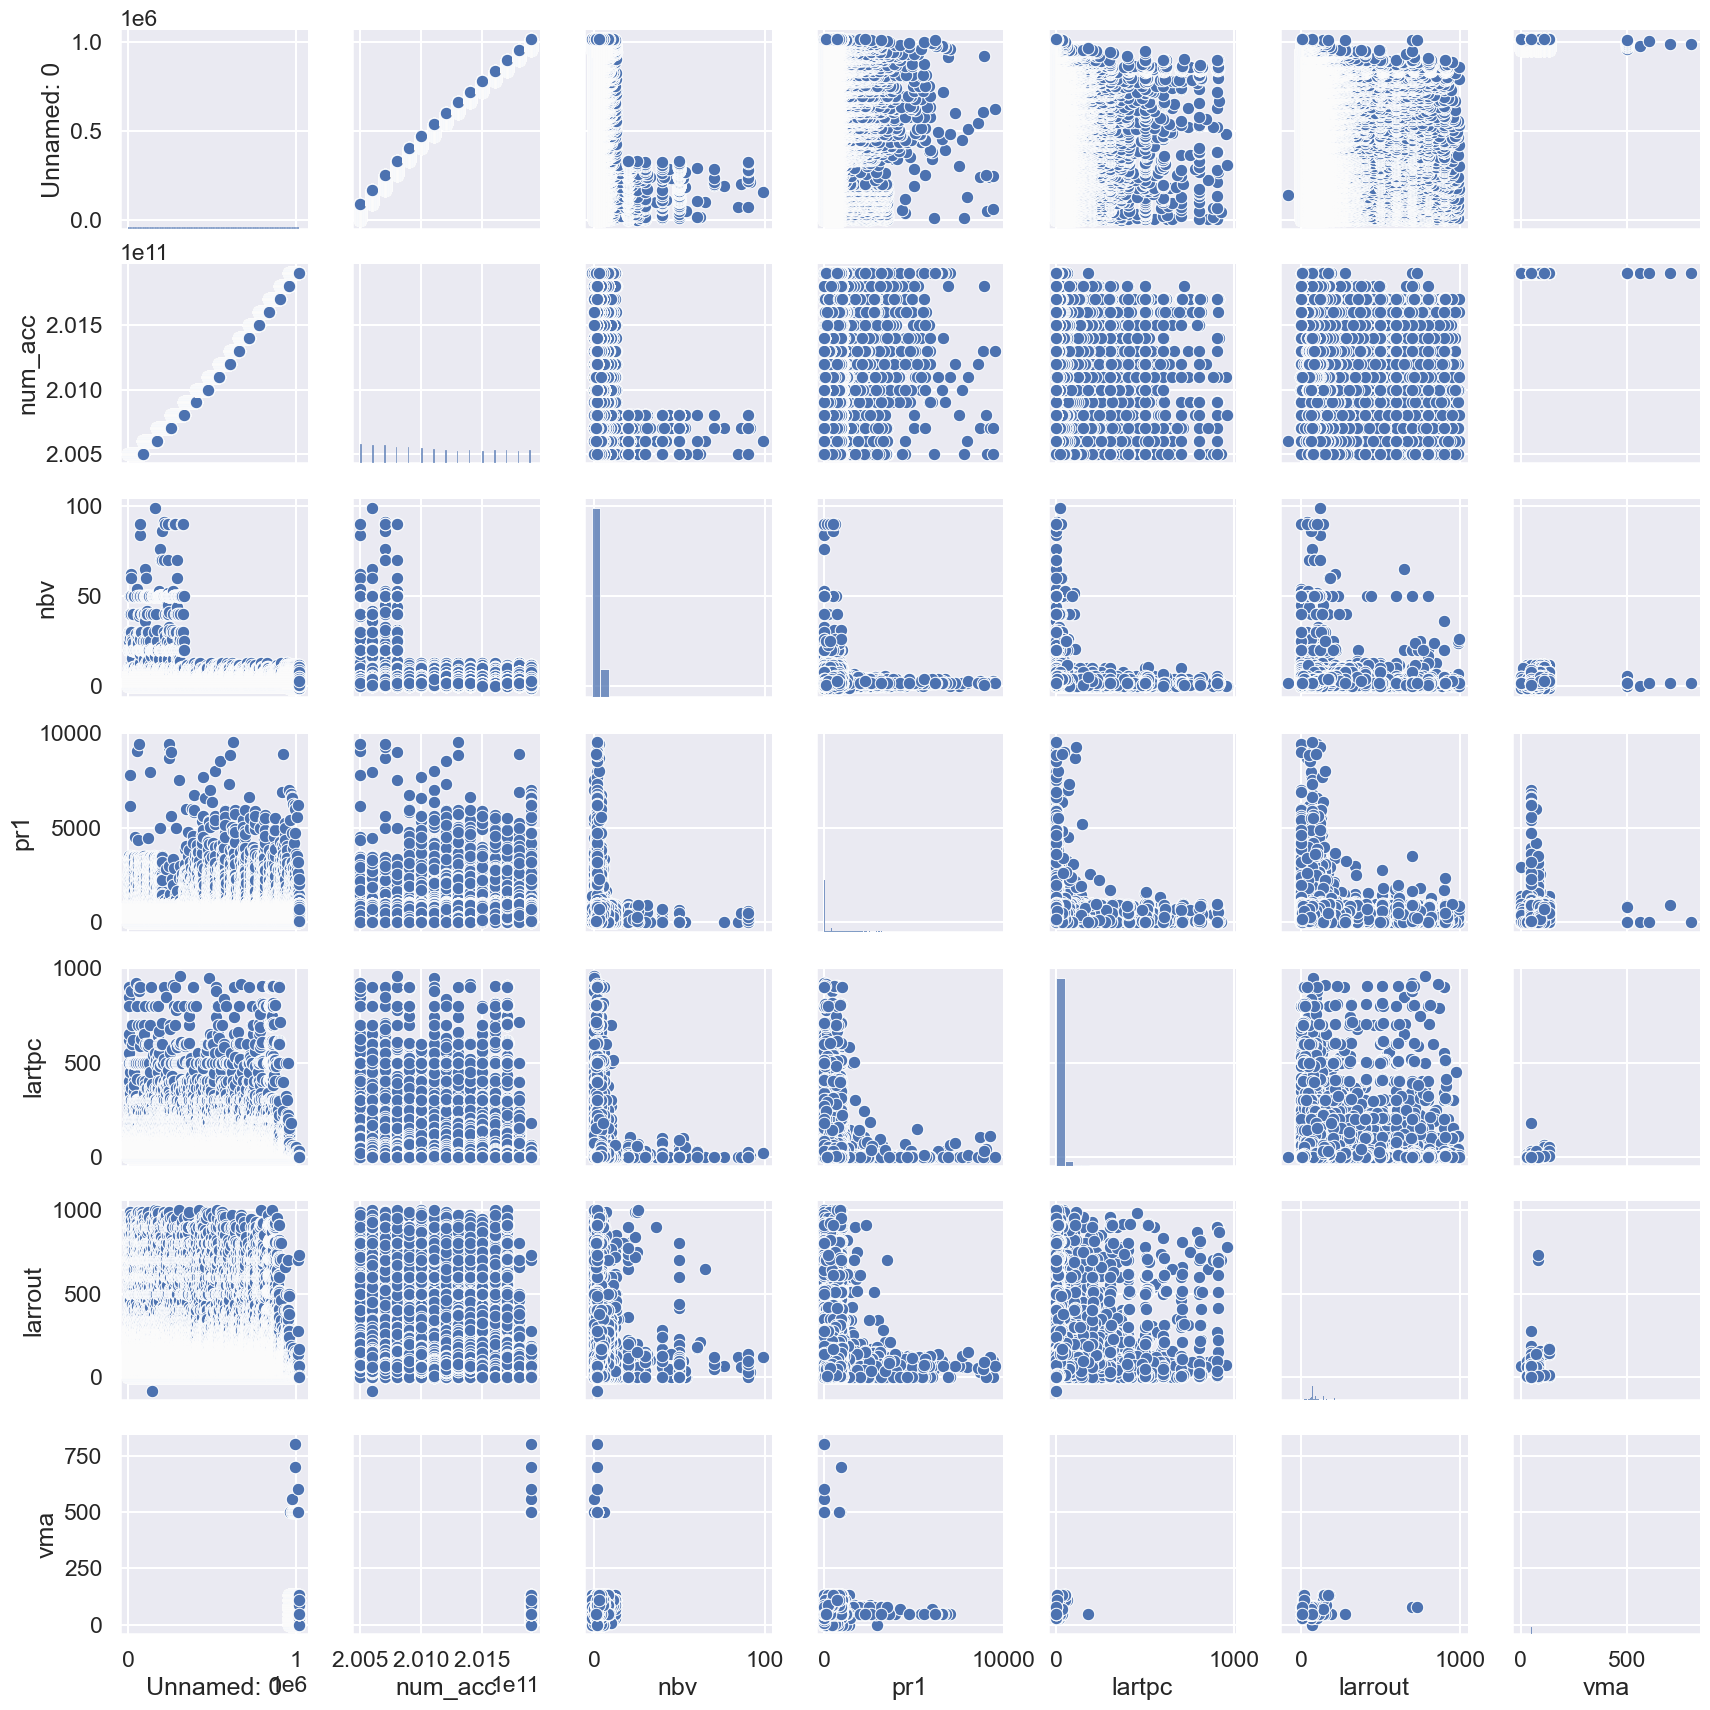

In [221]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=lieux)
plt.show();

<div class="alert alert-info">Résummé des champs à supprimer
    <ul>
        - <B> voie</B>, qui devrait contenir un numéro de rue mais qui contient des noms de rue. 480031 observations sont rempli par "0", soit 52% <br>
        - <B> v1 </B> contient 99.22% d valeurs manquantes, voir matrice de nulleté. Valeurs attendues : 2 bis, 3 ter etc., obtenues : 0.,  2.,  1.,  9.,  6.,  4.,  5.,  7.,  3.,  8. avec 99% de "0"<br>
        - <B> v2 </B> contient la lettre indice alphanumérique de la route. Est non renseigné à 95.72% dont 4.2% de valeurs correctes<br>
        - <B> PR, PR1 et vma </B> Numéro du PR de rattachement : près de 47% de valeurs manquantes, 33% contiennent la valeur '0'. Ce qui revient à 70% des valeurs inexploitables. Voir intérêt pour notre études <br>
        - <B> vma </B> pour la Vitesse maximale autorisée sur le lieu et au moment de l’accident : 94% valurs manquantes <br> 
        - <B> vosp </B> Existence d’une voie réservée, est sans objet pour 94% d'observations.<br>
        - <B> infra </B> rempli par la valeur "Aucun" à 88%.<br>
        - <B> </B> <br>
        - <B> </B> <br>
        - <B> </B> <br>
</ul>
    
    Action : suppression des colonnes

</div>

In [222]:
# Suppression des colonnes ayant peu d'intérêts de notre point de vue : 
lieux.drop(columns=["voie", "v1", "v2", 'pr', 'pr1', 'vosp', 'env1', 'vma'], inplace=True)
lieux.columns

Index(['Unnamed: 0', 'num_acc', 'catr', 'circ', 'nbv', 'prof', 'plan',
       'lartpc', 'larrout', 'surf', 'infra', 'situ', 'annee'],
      dtype='object')

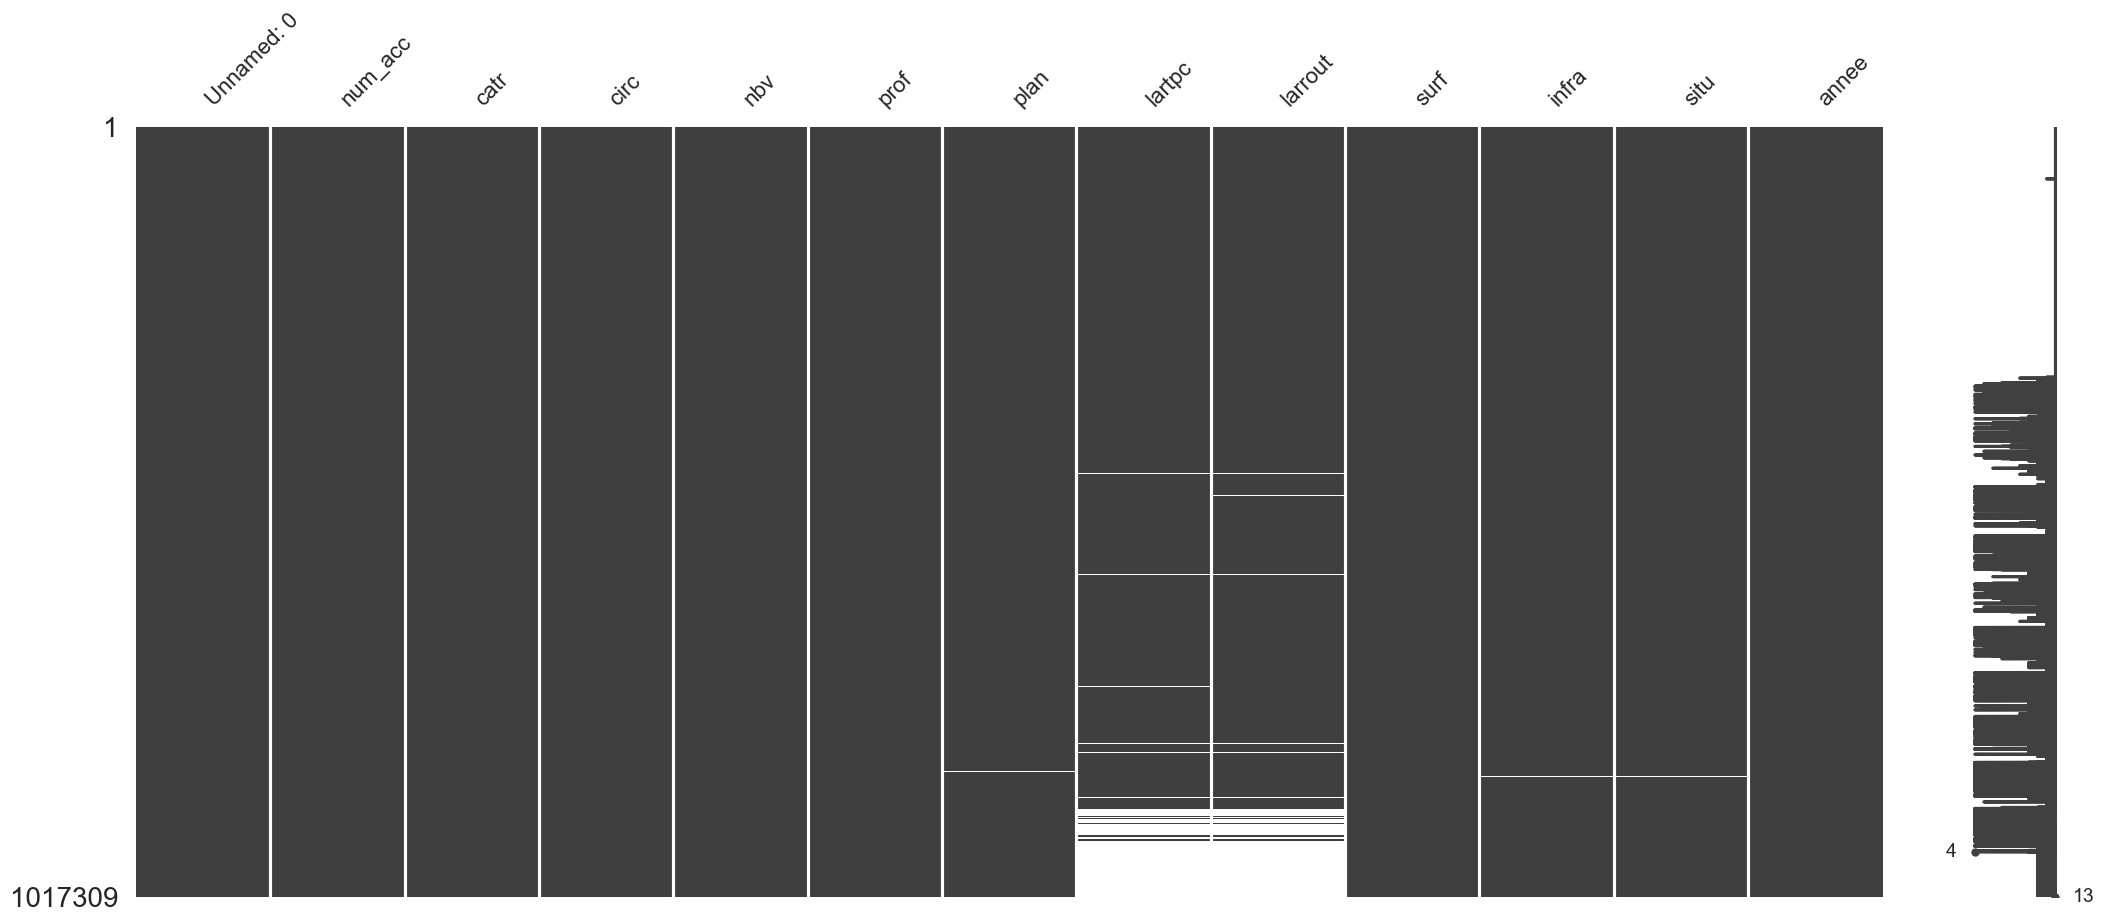

In [223]:
## Plot nullity matrix of lieux
fig = msno.matrix(lieux)

<div class="alert alert-warning"> D'autres suppressions potentiels ?
    <ul>
        - <B> nbv </B> pour le "nombre total de voies de circulation" contient trop de valeurs abbérantes. Valeurs attendues : 2 bis, 3 ter etc., obtenues : 0.,  2.,  1.,  9.,  6.,  4.,  5.,  7.,  3.,  8. avec 99% de "0". Valeur prépondérante = "2" <br>
        - <B> larrout </B> Largeur de la chaussée affectée à la circulation des véhicules ne sont pas compris les bandes d'arrêt d'urgence, les TPC et les places de stationnement (en m) <br>
        - <B> lartpc </B> Largeur du terre-plein central (TPC) s'il existe (en m).  <br>
        - <B> </B> <br>
        - <B> </B> <br>
        - <B> </B> <br>
</ul>

    Action : Possibilité de supprimer juste les lignes contenant les valeurs manquantes. Par ailleurs, ces 3 champs semblent pouvoir être accessible par d'autres moyens. Nous prenons la décision de les SUPPRIMER que de les garder.
</div>

In [224]:
lieux.columns

Index(['Unnamed: 0', 'num_acc', 'catr', 'circ', 'nbv', 'prof', 'plan',
       'lartpc', 'larrout', 'surf', 'infra', 'situ', 'annee'],
      dtype='object')

In [225]:
# Suppression des colonnes ayant peu d'intérêts de notre point de vue : 
lieux.drop(columns=["nbv", "lartpc", "larrout"], inplace=True)
lieux.columns

Index(['Unnamed: 0', 'num_acc', 'catr', 'circ', 'prof', 'plan', 'surf',
       'infra', 'situ', 'annee'],
      dtype='object')

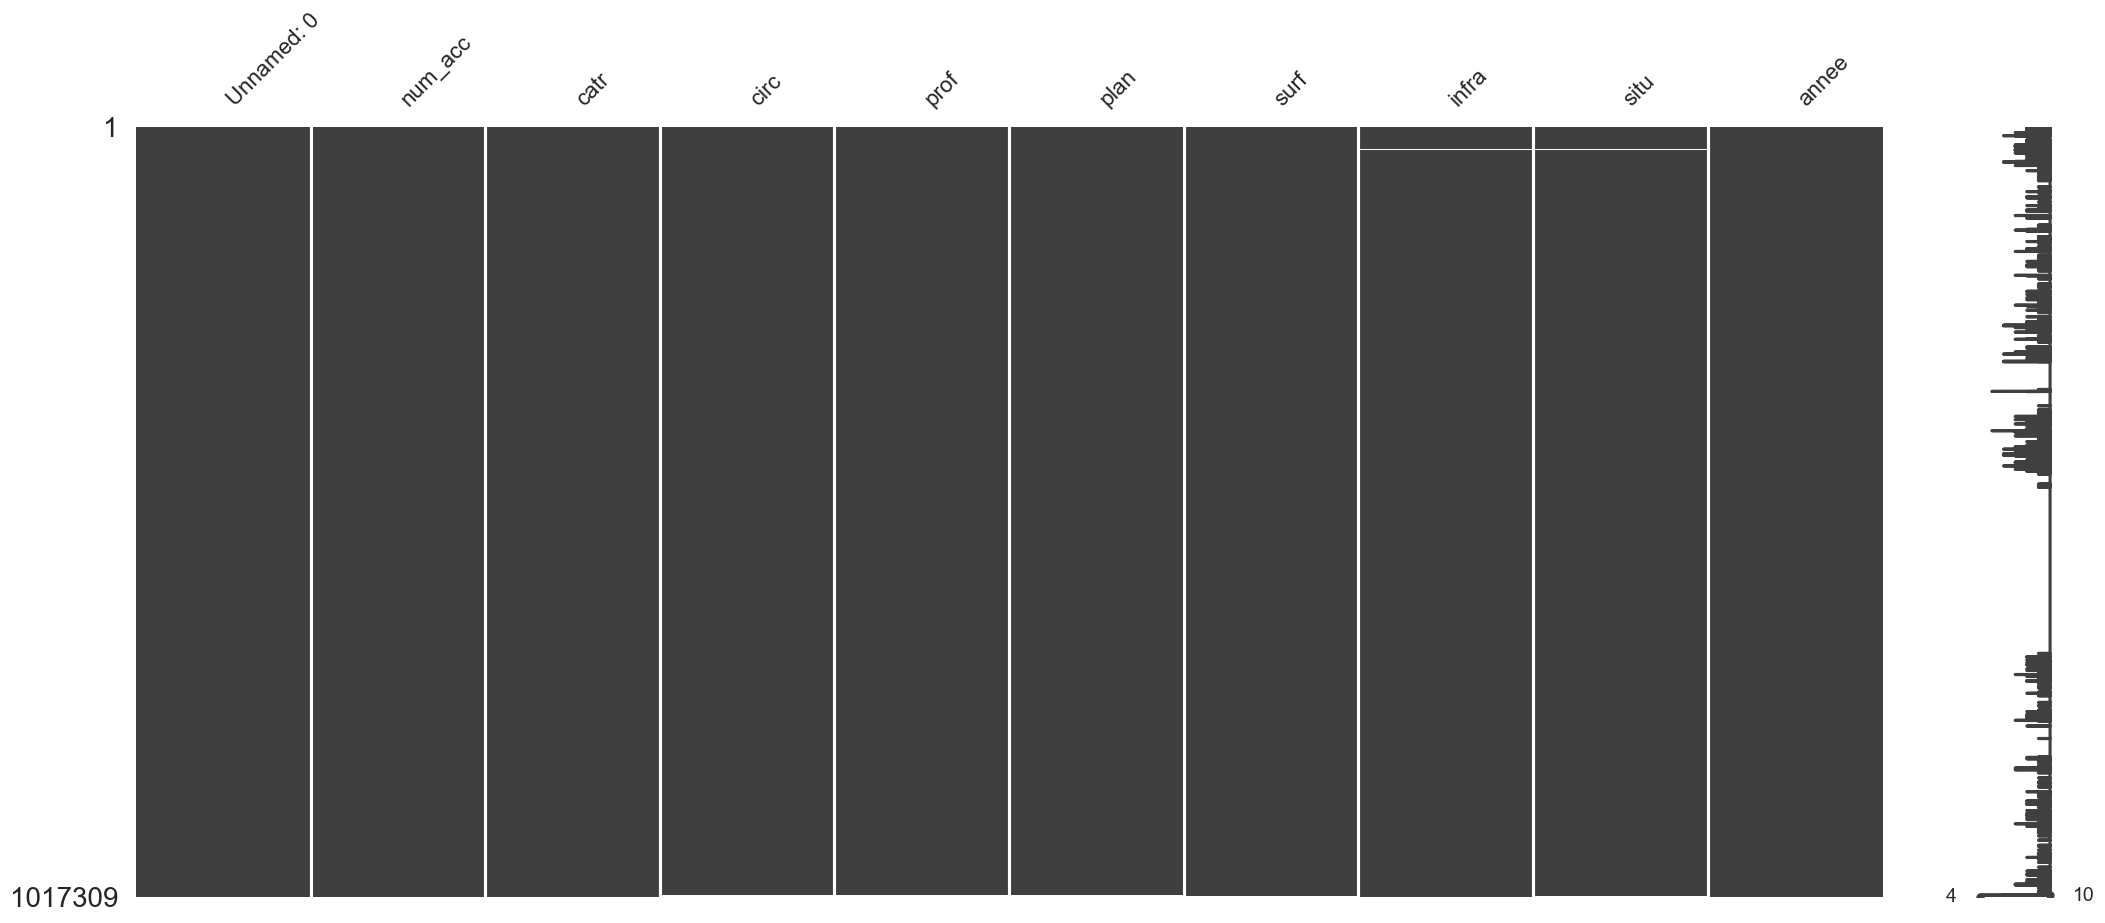

In [227]:
## Plot nullity matrix of lieux
fig = msno.matrix(lieux.sort_values("plan"))

In [228]:
lieux.columns

Index(['Unnamed: 0', 'num_acc', 'catr', 'circ', 'prof', 'plan', 'surf',
       'infra', 'situ', 'annee'],
      dtype='object')

In [230]:
# Drop the rows where at least one element is missing.
lieux = lieux.dropna(axis=0)

In [231]:
lieux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010689 entries, 0 to 1017308
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Unnamed: 0  1010689 non-null  int64         
 1   num_acc     1010689 non-null  int64         
 2   catr        1010689 non-null  category      
 3   circ        1010689 non-null  category      
 4   prof        1010689 non-null  category      
 5   plan        1010689 non-null  category      
 6   surf        1010689 non-null  category      
 7   infra       1010689 non-null  category      
 8   situ        1010689 non-null  category      
 9   annee       1010689 non-null  datetime64[ns]
dtypes: category(7), datetime64[ns](1), int64(2)
memory usage: 37.6 MB


In [232]:
# Export DataFrame to csv
lieux.to_csv("lieux11.csv")

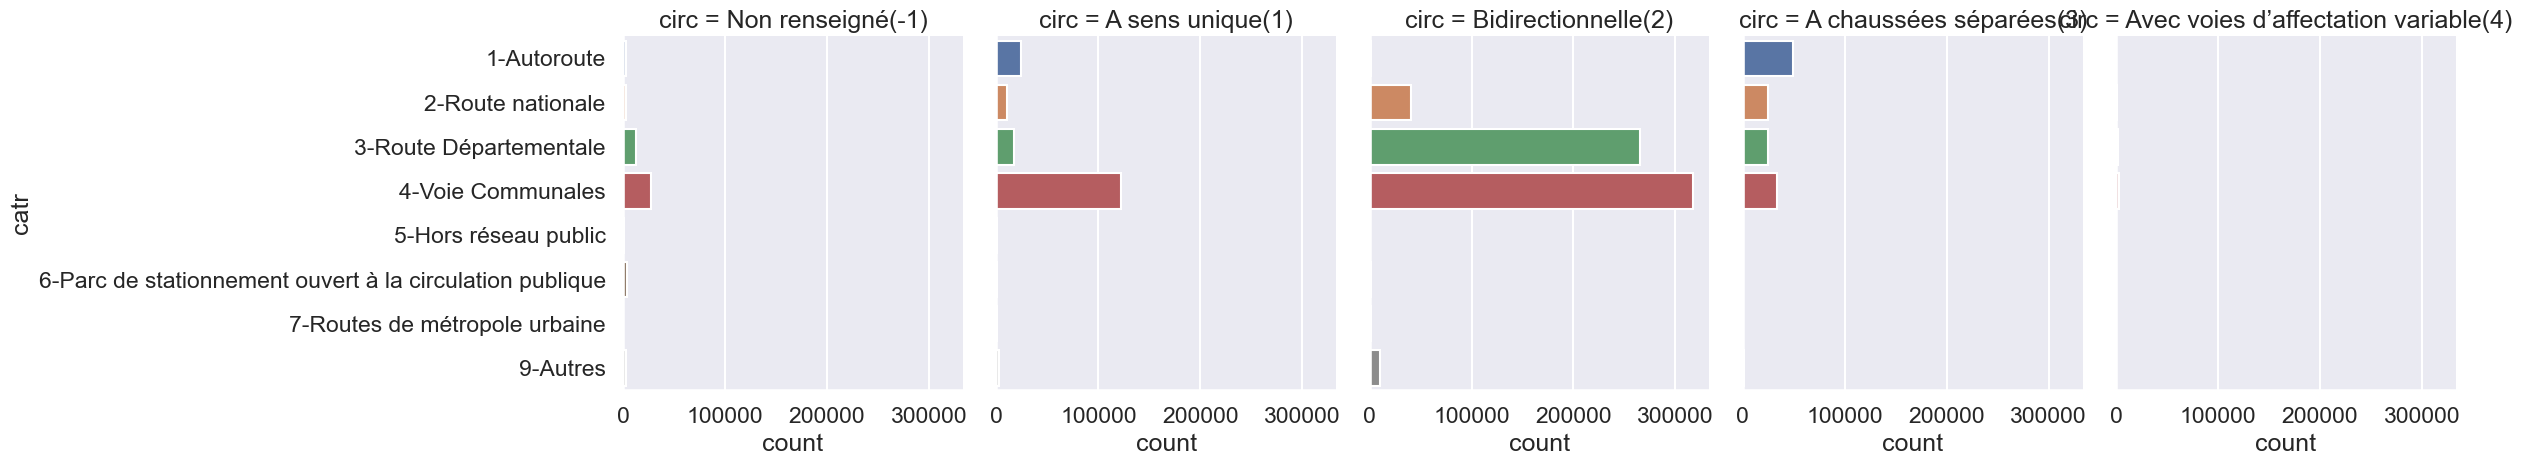

In [236]:
# Draw scatter plot for correlation beetween 2 varaiables
# Create count plot with region on the y-axis
#plt.figure(figsize=(20, 50))
sns.catplot(y='catr', data=lieux, kind='count', col="circ");